# Exploratory Data Analysis - Lending Club
### Goal: Identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.

## Import Libraries

In [2366]:
import pandas as pd
import numpy as np

#Data Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns 

import warnings
warnings.filterwarnings('ignore')

## Load the Data 

In [2367]:
loan_df=pd.read_csv("loan.csv")

In [2368]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [2369]:
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


## 1. Data Cleaning
1. Fix rows and columns
2. Fix missing values
3. Standardise values
4. Fix invalid values
5. Filter data

In [2370]:
# Inspect data
print("Shape - (Rows, Columns): ", loan_df.shape)
loan_df.isnull().sum()

Shape - (Rows, Columns):  (39717, 111)


id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

### 1.1. Columns with all null values are not of any use for us, so let's drop these columns.

In [2371]:
loan_df.dropna(axis = 1, how = 'all', inplace = True)
loan_df.shape

(39717, 57)

### 1.2. Columns which have 1 unique value will not impact our analysis, so let's drop them as well

In [2372]:
unique_counts = loan_df.nunique()
unique_counts

id                            39717
member_id                     39717
loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
term                              2
int_rate                        371
installment                   15383
grade                             7
sub_grade                        35
emp_title                     28820
emp_length                       11
home_ownership                    5
annual_inc                     5318
verification_status               3
issue_d                          55
loan_status                       3
pymnt_plan                        1
url                           39717
desc                          26526
purpose                          14
title                         19615
zip_code                        823
addr_state                       50
dti                            2868
delinq_2yrs                      11
earliest_cr_line                526
inq_last_6mths              

In [2373]:
columns_with_1_value = unique_counts[unique_counts == 1].index.tolist()
loan_df.drop(columns_with_1_value, axis = 1, inplace = True)
print(loan_df.shape)
loan_df.columns

(39717, 48)


Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'pub_rec_bankruptcies'],
      dtype='object')

### 1.3. After going through the Data Dictionary for these 48 columns, we can identify columns that are not relevant for our analysis and drop them

- __id, member_id__ : not relevant for analysis as these are just unique ids, so this can be dropped
- __title, emp_title, desc, url__: not relevant for analysis, random string not significant
- __zip_code__: though this could have been useful, but it only has first 3 digits of zipcode, so not significant
- __delinq_2yrs, mths_since_last_delinq, mths_since_last_record, revol_bal, revol_util, out_prncp, out_prncp_inv, total_pymnt, total_pymnt_inv, total_rec_prncp, total_rec_int, total_rec_late_fee, recoveries, collection_recovery_fee, last_pymnt_d, last_pymnt_amnt, next_pymnt_d__: Columns that are relevant only post approval, since we wont have these data while processing an application, analysis on these columns are not relevant.
- __funded_amnt, funded_amnt_inv__: this column is also available after processing the application
- __last_credit_pull_d__: The month when last credit report was pulled has no significance in the borrower defaulting, however credit score could be interesting. This can be dropped as well


In [2374]:
# dropping columns from above anaylis
loan_df = loan_df.drop(['id', 'member_id'], axis=1)
loan_df = loan_df.drop(['title', 'emp_title', 'desc', 'url'], axis=1)
loan_df = loan_df.drop(['zip_code'], axis=1)
loan_df = loan_df.drop(['delinq_2yrs', 'mths_since_last_delinq', 'mths_since_last_record', 'revol_bal', 'revol_util', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d'], axis=1)
loan_df = loan_df.drop(['funded_amnt', 'funded_amnt_inv'],axis=1)
loan_df = loan_df.drop(['last_credit_pull_d'], axis=1)
loan_df.shape

(39717, 21)

In [2375]:
loan_df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'addr_state', 'dti',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'total_acc', 'pub_rec_bankruptcies'],
      dtype='object')

### 1.4. Rows which are not valid can be dropped. From loan_status column, we cannot consider loans that are in current status. These rows cannot be used to infer whether loan will be defaulted or not, so these rows can be dropped.


In [2376]:
print(loan_df['loan_status'].unique())
loan_df = loan_df[loan_df.loan_status != 'Current']
loan_df.shape

['Fully Paid' 'Charged Off' 'Current']


(38577, 21)

### 1.5. Inspect missing values and handle them

In [2377]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38577 entries, 0 to 39716
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             38577 non-null  int64  
 1   term                  38577 non-null  object 
 2   int_rate              38577 non-null  object 
 3   installment           38577 non-null  float64
 4   grade                 38577 non-null  object 
 5   sub_grade             38577 non-null  object 
 6   emp_length            37544 non-null  object 
 7   home_ownership        38577 non-null  object 
 8   annual_inc            38577 non-null  float64
 9   verification_status   38577 non-null  object 
 10  issue_d               38577 non-null  object 
 11  loan_status           38577 non-null  object 
 12  purpose               38577 non-null  object 
 13  addr_state            38577 non-null  object 
 14  dti                   38577 non-null  float64
 15  earliest_cr_line      38

In [2378]:
loan_df.isnull().mean() * 100

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_length              2.677761
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
addr_state              0.000000
dti                     0.000000
earliest_cr_line        0.000000
inq_last_6mths          0.000000
open_acc                0.000000
pub_rec                 0.000000
total_acc               0.000000
pub_rec_bankruptcies    1.806776
dtype: float64

#### Fill missing values for emp_length. Since it is Categorical data, we can assign "mode" (most frequent value) to missing rows. It would be safe since the missing value count is low.

In [2379]:
emp_length_mode = loan_df['emp_length'].mode()
print(emp_length_mode)
loan_df.emp_length.fillna(emp_length_mode[0], inplace=True)

0    10+ years
Name: emp_length, dtype: object


#### Fill missing values for pub_rec_bankruptcies. Though the values are numerical, it can still be treated as categorical. We will assign mode to missing values for this column as well. The mode comes out to be 0. Also from business perspective it is probably safer to assume zero backruptcies.

In [2380]:
pub_rec_bankruptcies_mode = loan_df['pub_rec_bankruptcies'].mode()
print(pub_rec_bankruptcies_mode)
loan_df.pub_rec_bankruptcies.fillna(pub_rec_bankruptcies_mode[0], inplace=True)

0    0.0
Name: pub_rec_bankruptcies, dtype: float64


#### Drop duplicates if any

In [2381]:
loan_df = loan_df.drop_duplicates()
loan_df.shape

(38577, 21)

### 1.6. Outlier Treatment

##### 1.6.1 loan_amount

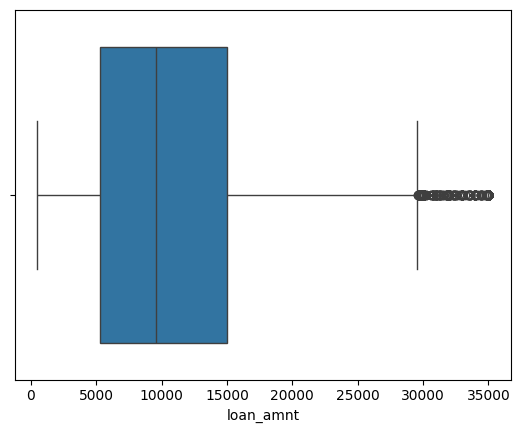

In [2382]:
sns.boxplot(x=loan_df['loan_amnt'])
plt.show()
# looking at the plot, no outlier treatment required

##### 1.6.2 int_rate

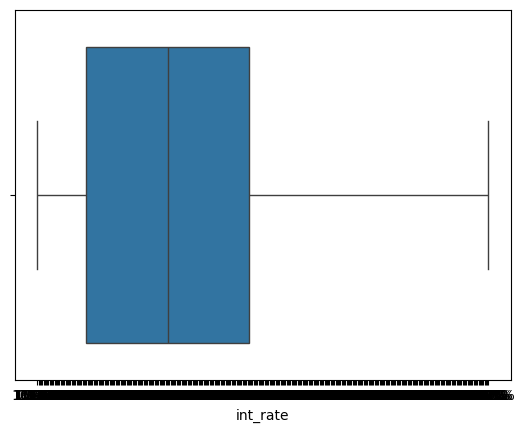

In [2383]:
sns.boxplot(x=loan_df['int_rate'])
plt.show()
# looking at the plot, no outlier treatment required

##### 1.6.2 annual_inc

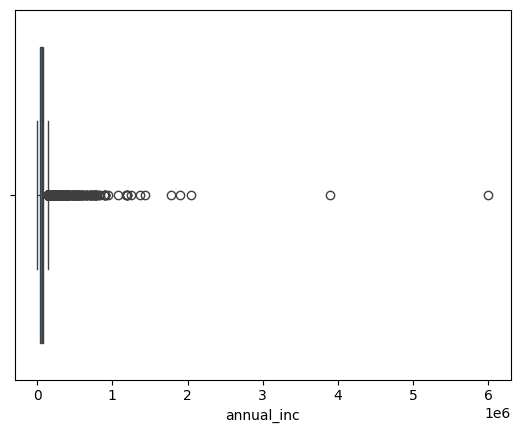

In [2384]:
sns.boxplot(x=loan_df['annual_inc'])
plt.show()
# PLot clearly indicates that there are a few outliers which needs to be removed

In [2385]:
ann_inc_quantile = loan_df.annual_inc.quantile([0.9, 0.95, 0.97,0.98, 0.99])
print(ann_inc_quantile)
# above 0.95, values are way above the distribution, so we could get rid of these rows
ann_inc_threshold = loan_df.annual_inc.quantile(0.95)
print(loan_df.shape)
loan_df = loan_df[loan_df.annual_inc <= ann_inc_threshold]
loan_df.shape

0.90    115000.0
0.95    140004.0
0.97    165000.0
0.98    187000.0
0.99    234144.0
Name: annual_inc, dtype: float64
(38577, 21)


(36654, 21)

##### 1.6.2 total_acc

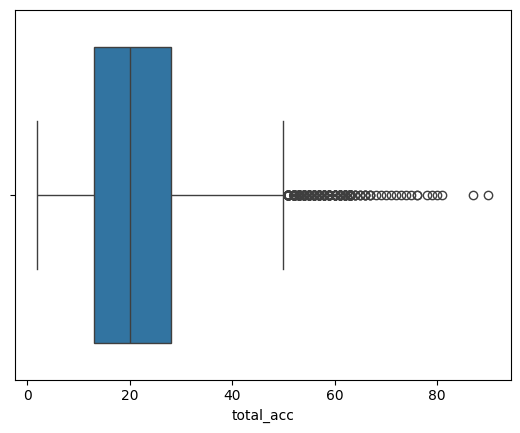

In [2386]:
sns.boxplot(x=loan_df['total_acc'])
plt.show()
# PLot clearly indicates that there are a few outliers which needs to be removed, however we will not remove as it is not a critical factor, we can instead convert this to categorical data by partitioning them into bins

### 1.7. Format data by reshaping the data - convert data type to aid in analysis

#### Columns classification
- loan_amount: numerical
- funded_amount: numerical
- term: categorical  (with 2 values 36 months and 60 months)
- int_rate: numerical
- installment: numerical
- grade: categorical
- sub_grade: categorical
- emp_length: categorical
- home_ownership: categorical
- annual_inc: numerical
- verification_status: categorical
- issue_d: date
- loan_status: categorical
- purpose: categorical
- addr_state: categorical
- dti: numerical
- earliest_cr_line: date (can be converted to numerical, say number of years of credit history from this date to date when loan was issued)
- inq_last_6mths: numerical
- open_acc: numerical
- pub_rec: numerical
- total_acc: numerical
- pub_rec_bankruptcies: categorical only 3 numerical values, 

##### 1.7.1 int_rate column - int_rate - convert string into float by removing % for ease of analysis

In [2387]:
loan_df.int_rate=loan_df.int_rate.apply(lambda i_rate:str(i_rate).replace('%','')).astype('float').round(2)

##### 1.7.2 Convert few numerical values into Categories for ease of anyalysis

In [2388]:
loan_df['int_rate_cat'] = pd.cut(loan_df['int_rate'], [5,10,15,20,25], labels=['5-10', '10-15', '15-20', '20-25'])

loan_df['open_acc_cat'] = pd.cut(loan_df['open_acc'], [0, 5, 10,45], labels=['<5', '5-10', '>=10'])

loan_df['total_acc_cat'] = pd.cut(loan_df['open_acc'], [0, 5, 10, 20, 90], labels=['<5', '5-10', '10-20', '>20'])

loan_df['dti_cat'] = pd.cut(loan_df['dti'], [0,5,10,15,20,30], labels=['0-5','5-10', '10-15', '15-20', '>20'])

##### 1.7.4. Convert loan_status to integer for ease of analysis.
1 - Charged Off

0 - Fully Paid


In [2389]:
loan_df['loan_status'] = loan_df['loan_status'].map({'Charged Off': 1, 'Fully Paid': 0})

## 2. Derived Metrics and Grouping Columns

In [2390]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36654 entries, 0 to 39716
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   loan_amnt             36654 non-null  int64   
 1   term                  36654 non-null  object  
 2   int_rate              36654 non-null  float64 
 3   installment           36654 non-null  float64 
 4   grade                 36654 non-null  object  
 5   sub_grade             36654 non-null  object  
 6   emp_length            36654 non-null  object  
 7   home_ownership        36654 non-null  object  
 8   annual_inc            36654 non-null  float64 
 9   verification_status   36654 non-null  object  
 10  issue_d               36654 non-null  object  
 11  loan_status           36654 non-null  int64   
 12  purpose               36654 non-null  object  
 13  addr_state            36654 non-null  object  
 14  dti                   36654 non-null  float64 
 15  earlies

### 2.1. Derived column - Credit line history in years till application year -  cr_line_hist_years

#### Credit history could be interesting for us, we have issue_d and earliest_cr_line, we can derive the number of years since the earliest credit history. How long the applicant has credit history needs to be assessed.


In [2391]:
# First we can get year from both these columns and take difference
issue_year =  pd.to_datetime(loan_df['issue_d'], format='%b-%y').dt.year
ear_cred_line_year = pd.to_datetime(loan_df['earliest_cr_line'], format='%b-%y').dt.year
ear_cred_line_year = ear_cred_line_year.apply(lambda x: x-100 if x>2024 else x)
loan_df['cr_line_hist_years'] = issue_year - ear_cred_line_year
loan_df = loan_df.drop(['earliest_cr_line'], axis=1)

### 2.2. Derived column - Ratio of Loan Amount to Income - loan_to_income_ratio

#### This metric helps us assess the extent to which borrowers are leveraging their annual income for borrowing. It would be a relative measure of potential repayment capacity.


In [2392]:
loan_df['loan_to_income_ratio'] = loan_df['loan_amnt'] / loan_df['annual_inc']
loan_df['loan_to_income_ratio'].describe()
loan_df['loan_to_income_ratio_cat'] = pd.cut(loan_df['loan_to_income_ratio'], [0,1,2,3,9], labels=['0-1','1-2', '2-3', '>3'])

### 2.3. Derived column - Ratio of Installment to Monthly Income

#### This metric evaluates the proportion of borrowers' annual income dedicated to loan installment payments. It will provide insights into applicants ability to sustain loan repayments over the long term.

In [2393]:
loan_df['installment_to_income_ratio'] = loan_df['installment'] / (loan_df['annual_inc']/12)
loan_df['installment_to_income_ratio_cat'] = pd.cut(loan_df['installment_to_income_ratio'], [0,0.02,0.04,0.06,0.2], labels=['0-2%','2%-4%', '4%-6%', '>6%'])

### 2.4. Derived column - Verification Status Hierarchy

#### Considering the verification status Verified > Source Verified > Not Verified, thus we can set verification_status_hierarchy corresponding to Verified: 3, Source Verified: 2. Not Verified: 1 for ease of analysis

In [2394]:
loan_df['verification_status_hierarchy'] = loan_df['verification_status'].map({'Verified': 2, 'Source Verified': 1, 'Not Verified': 0})

### 2.5. grouping columns

In [2395]:
loan_df.columns.size

30

In [2396]:
num_cols = ['loan_amnt', 'installment', 'annual_inc', 'dti', 'cr_line_hist_years', 'inq_last_6mths',  'pub_rec', 'loan_to_income_ratio', 'installment_to_income_ratio']
cat_cols = ['term', 'int_rate_cat', 'open_acc_cat', 'total_acc_cat', 'grade', 'sub_grade', 'emp_length', 'home_ownership', 'verification_status', 'purpose', 'addr_state', 'pub_rec_bankruptcies', 'dti_cat']
extra_cols = ['issue_d', 'int_rate', 'open_acc', 'total_acc']
assessement_cols = ['loan_status']

### 2.6. For performance reasons in pandas, we can set type as Category for all cat_cols

In [2397]:
for c in cat_cols:
    loan_df[c] = loan_df[c].astype('category')
loan_df.dtypes

loan_amnt                             int64
term                               category
int_rate                            float64
installment                         float64
grade                              category
sub_grade                          category
emp_length                         category
home_ownership                     category
annual_inc                          float64
verification_status                category
issue_d                              object
loan_status                           int64
purpose                            category
addr_state                         category
dti                                 float64
inq_last_6mths                        int64
open_acc                              int64
pub_rec                               int64
total_acc                             int64
pub_rec_bankruptcies               category
int_rate_cat                       category
open_acc_cat                       category
total_acc_cat                   

In [2398]:
defaulted_loans_df = loan_df[loan_df['loan_status']==1]

## 3. Univariate Analysis - Visualizing Data

Analysis with Single variable
- Mean, Median, Max, Min, Std, Variance, Count
- Distribution (Histogram,Distplot,Countplot,boxplot)

In [2399]:
# Common functions:

def generate_single_column_plots(col, label, figsize=(10, 5)):
    fig, p = plt.subplots(1,2, figsize=figsize)
    sns.boxplot(x=col, data=loan_df, ax=p[0])
    sns.distplot(loan_df.loc[loan_df[col].notnull(), col], kde=True, hist=True, ax=p[1])
    p[0].set_xlabel(label)
    p[1].set_xlabel(label)
    plt.tight_layout()
    plt.show()

def generate_count_plot(col, label, title, reverse=False, figsize=(10,5), print_stats=True, df=loan_df):
    if print_stats:
        print(df[col].value_counts()*100/df[col].count())
    plt.figure(figsize=figsize)
    if reverse:
        plt.ylabel(label)
        sns.countplot(y=df[col])
    else:
        plt.xlabel(label)
        sns.countplot(x=df[col])
    plt.title(title)
    plt.show()

def generate_segmented_box_plot(num_col, cat_col, num_col_label, cat_col_label, figsize=(10,6)):
    plt.figure(figsize=figsize)
    sns.boxplot(data=loan_df, x=cat_col, y=num_col, hue='loan_status')
    plt.title(f'Boxplot of {num_col_label} by {cat_col_label} segmented by Loan Status')
    plt.xlabel(cat_col_label)
    plt.ylabel(num_col_label)
    plt.xticks(rotation=45)
    plt.legend(title='Loan Status')
    plt.show()
    
def generate_box_plot(num_col, num_col_label, figsize=(10,6), df=loan_df):
    plt.figure(figsize=figsize)
    sns.boxplot(data=df, x='loan_status', y=num_col)
    plt.title(f'Boxplot of {num_col_label} by Loan Status')
    plt.xlabel('Loan Status')
    plt.ylabel(num_col_label)
    plt.xticks(rotation=45)
    plt.legend(title='Loan Status')
    plt.show()
    
def segmented_univariate_analysis(column, column_label, sidetoside=True, sort=True, reverse=False):
    segments = list(loan_df[column].unique())
    if sort:
        segments.sort()
    
    # Create a figure and axis
    if sidetoside:
        fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    else:
        fig, axes = plt.subplots(2, 1, figsize=(10, 12))
    
    # Plot 1: Count of Charged Off loans in each segment
    if not reverse:
        sns.countplot(x=column, hue='loan_status', data=loan_df, order=segments, ax=axes[0])
        axes[0].set_xlabel(column_label)
        axes[0].set_ylabel('Count')
        axes[0].set_title(f'Count of Charged Off Loans by {column_label}')
        axes[0].tick_params(axis='x', rotation=45)
    else:
        sns.countplot(y=column, hue='loan_status', data=loan_df, order=segments, ax=axes[0])
        axes[0].set_ylabel(column_label)
        axes[0].set_xlabel('Count')
        axes[0].set_title(f'Count of Charged Off Loans by {column_label}')
        axes[0].tick_params(axis='y', rotation=45)
    
    # Plot 2: Percentage of Charged Off loans in each segment
    charged_off_percent = (loan_df[loan_df['loan_status'] == 1].groupby(column)['loan_status'].count() / loan_df.groupby(column)['loan_status'].count()) * 100
    
    if not reverse:
        sns.barplot(x=charged_off_percent.index, y=charged_off_percent.values, order=segments, ax=axes[1])
        axes[1].set_xlabel(column_label)
        axes[1].set_ylabel('Defaulted %')
        axes[1].set_title(f'Defaulted Percentage by {column_label}')
        axes[1].tick_params(axis='x', rotation=45)
    else:
        sns.barplot(y=charged_off_percent.index, x=charged_off_percent.values, order=segments, ax=axes[1])
        axes[1].set_ylabel(column_label)
        axes[1].set_xlabel('Defaulted %')
        axes[1].set_title(f'Defaulted Percentage by {column_label}')
        axes[1].tick_params(axis='y', rotation=45)
    
    # Show the plots
    plt.tight_layout()
    plt.show()

def bivariate_analysis_num_cat(num_column, cat_column, num_col_label, cat_col_label):
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=cat_column, y=num_column, hue='loan_status', data=loan_df, palette='Set2')
    plt.title(f'Bivariate Analysis: {num_col_label} vs {cat_col_label} with respect to Loan Status')
    plt.xlabel(cat_col_label)
    plt.ylabel(num_col_label)
    plt.xticks(rotation=45)
    plt.legend(title='Loan Status')
    plt.show()    

### 3.1. Numerical columns Visualization
num_cols = ['loan_amnt', 'installment', 'annual_inc', 'dti', 'cr_line_hist_years', 'inq_last_6mths',  'pub_rec', 'loan_to_income_ratio', 'installment_to_income_ratio']

### 3.1.1. Loan Amount
__Inference:__ Loan amount is mostly distributed between 5000 and 15000

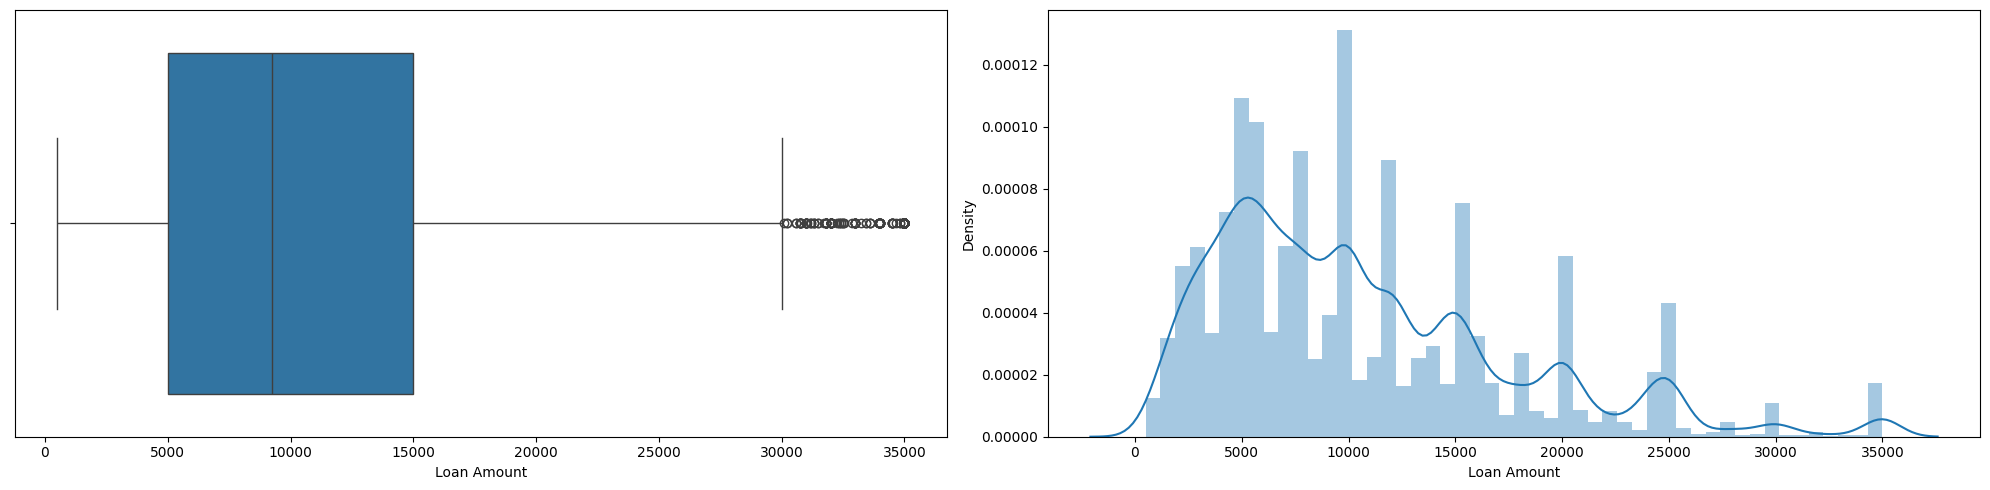

In [2400]:
generate_single_column_plots("loan_amnt", "Loan Amount", figsize=(20,5))

### 3.1.2. Installment
__Inference:__ Installment is mostly distributed around 100 to 400 

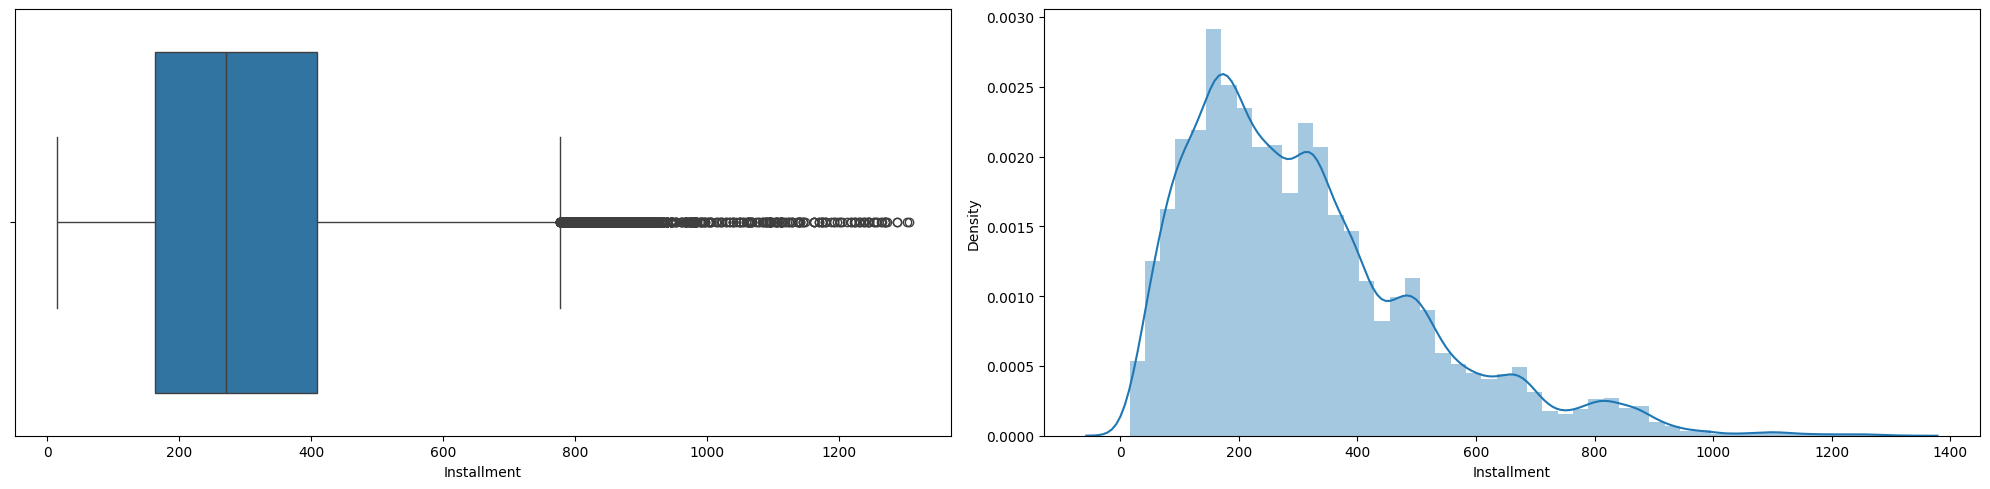

In [2401]:
generate_single_column_plots("installment", "Installment", figsize=(20,5))

### 3.1.3. Annual Income
__Inference:__ Mostly distributed around 30000 to 80000

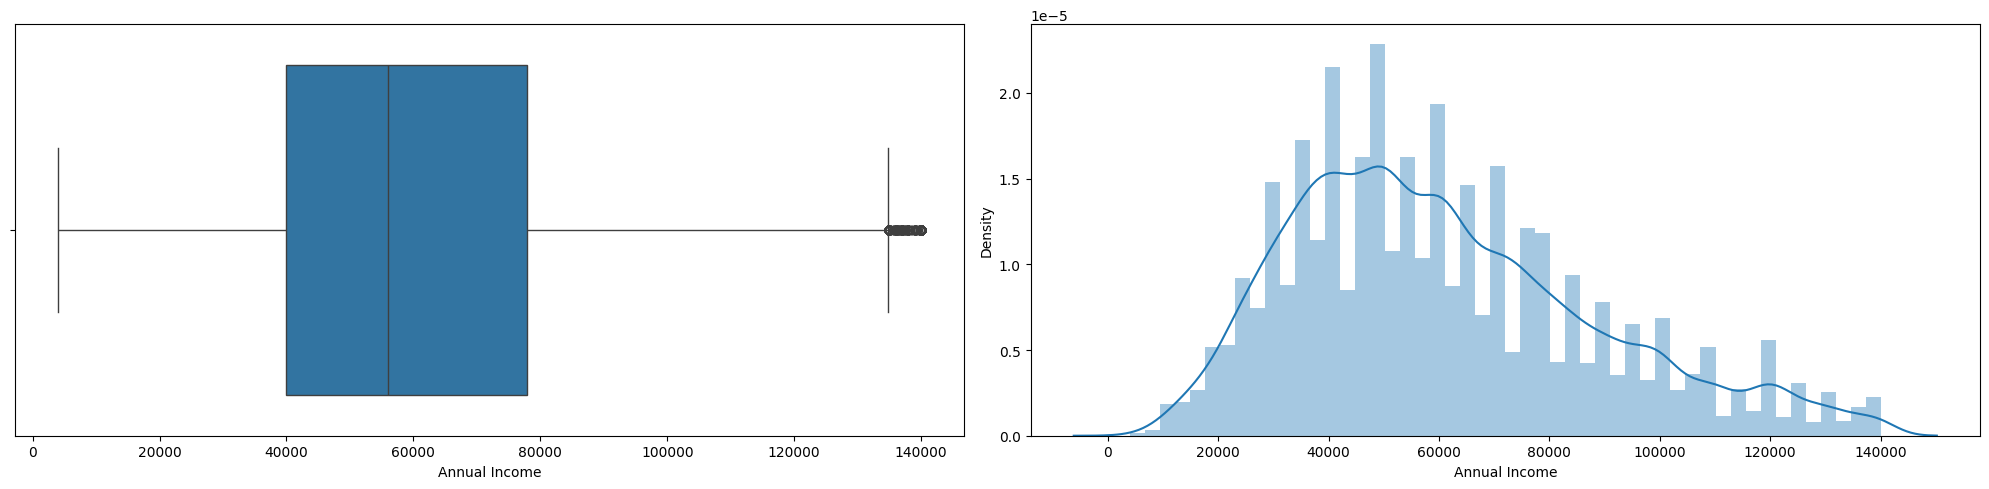

In [2402]:
generate_single_column_plots("annual_inc", "Annual Income", figsize=(20,5))

### 3.1.4. DTI
__Inference:__ Distributed around 0 to 20

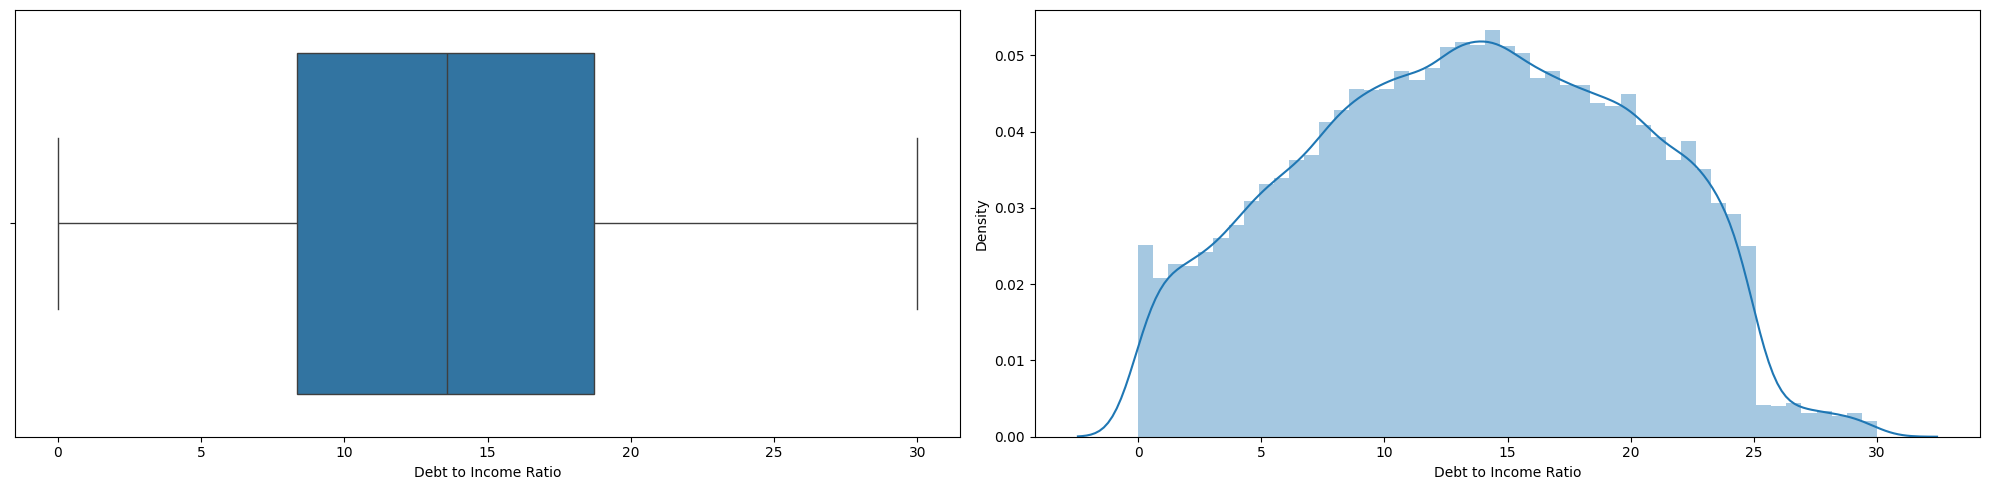

In [2403]:
generate_single_column_plots("dti", "Debt to Income Ratio", figsize=(20,5))

### 3.1.5. cr_line_hist_years
__Inference:__ Mostly distributed betwwen 10 and 25 years

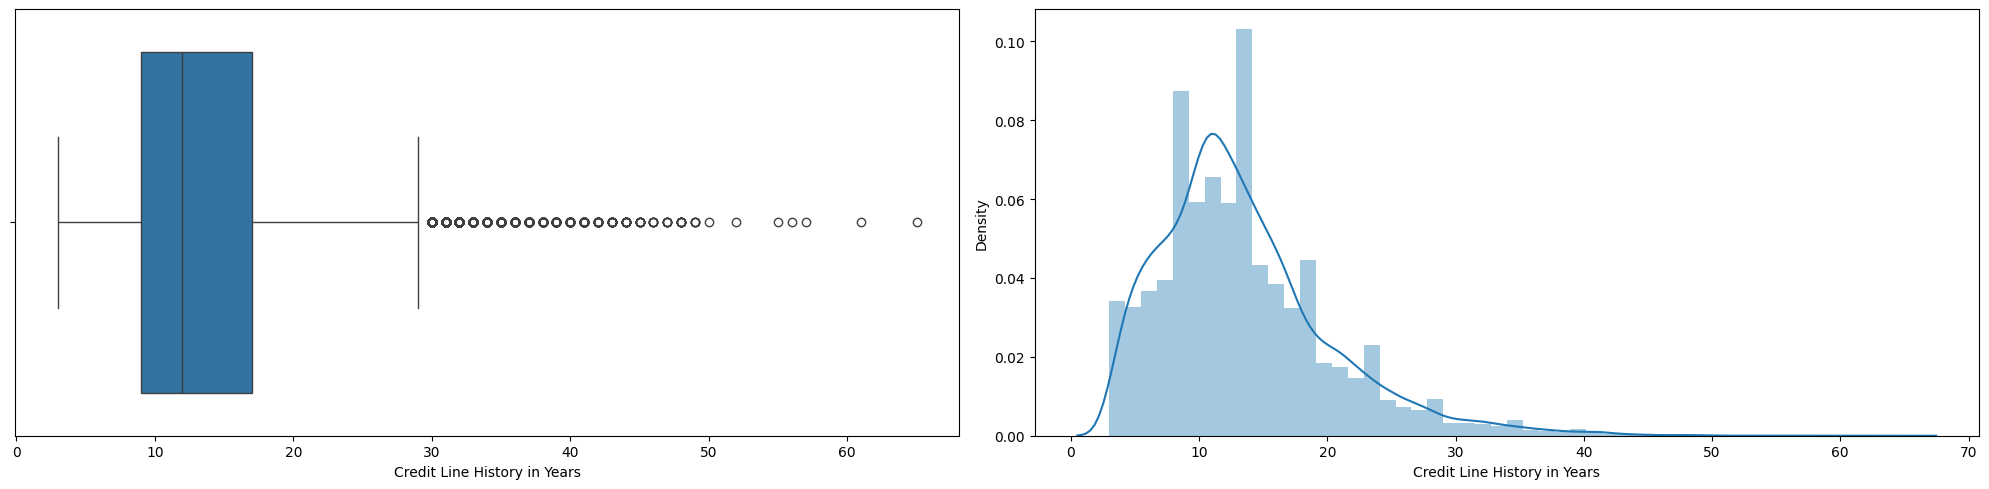

In [2404]:
generate_single_column_plots("cr_line_hist_years", "Credit Line History in Years", figsize=(20,5))

### 3.1.6. inq_last_6mths

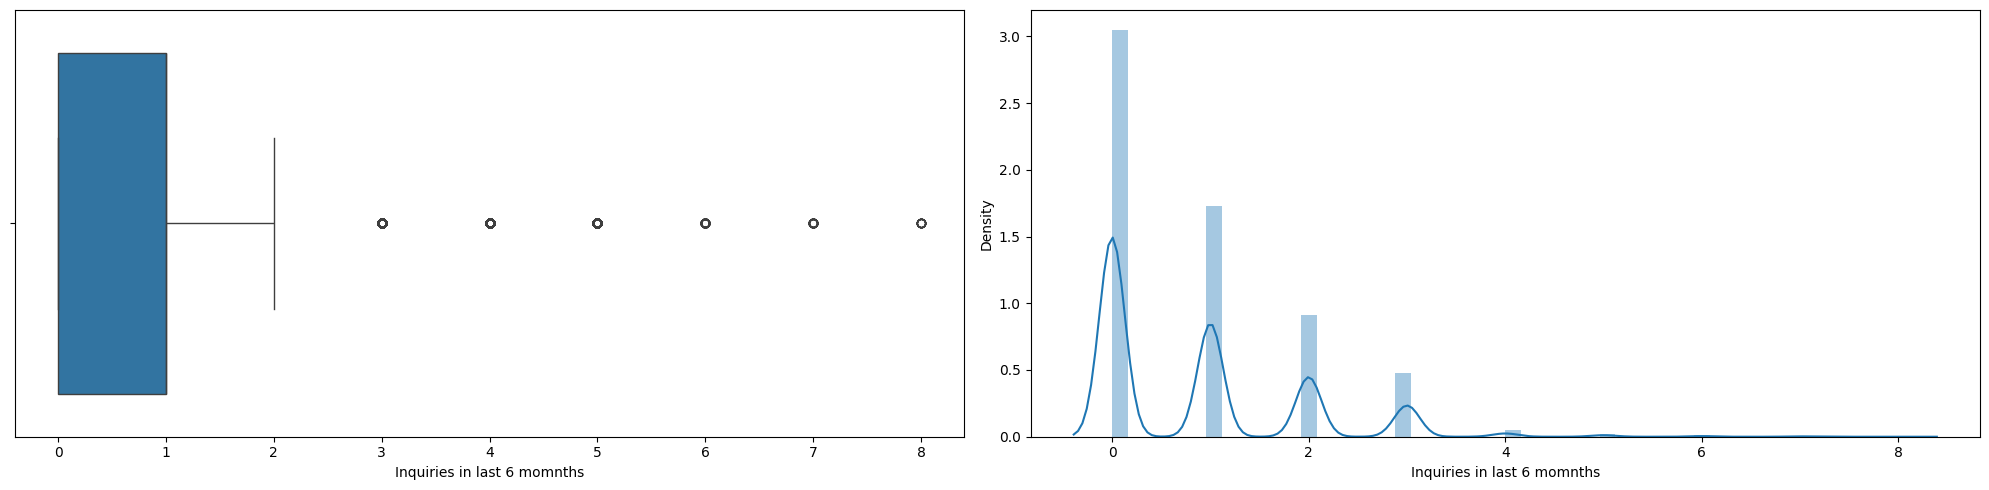

In [2405]:
generate_single_column_plots("inq_last_6mths", "Inquiries in last 6 momnths", figsize=(20,5))

### 3.1.7. pub_rec

count    36654.000000
mean         0.056829
std          0.240307
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          4.000000
Name: pub_rec, dtype: float64


<Axes: xlabel='pub_rec', ylabel='Count'>

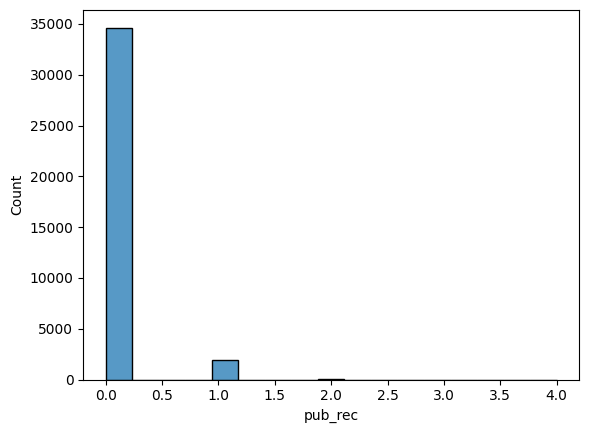

In [2406]:
print(loan_df.pub_rec.describe())
sns.histplot(x=loan_df['pub_rec'])


### 3.1.8. loan_to_income_ratio
__Inference:__ Mostly distributed around 0 to 0.3

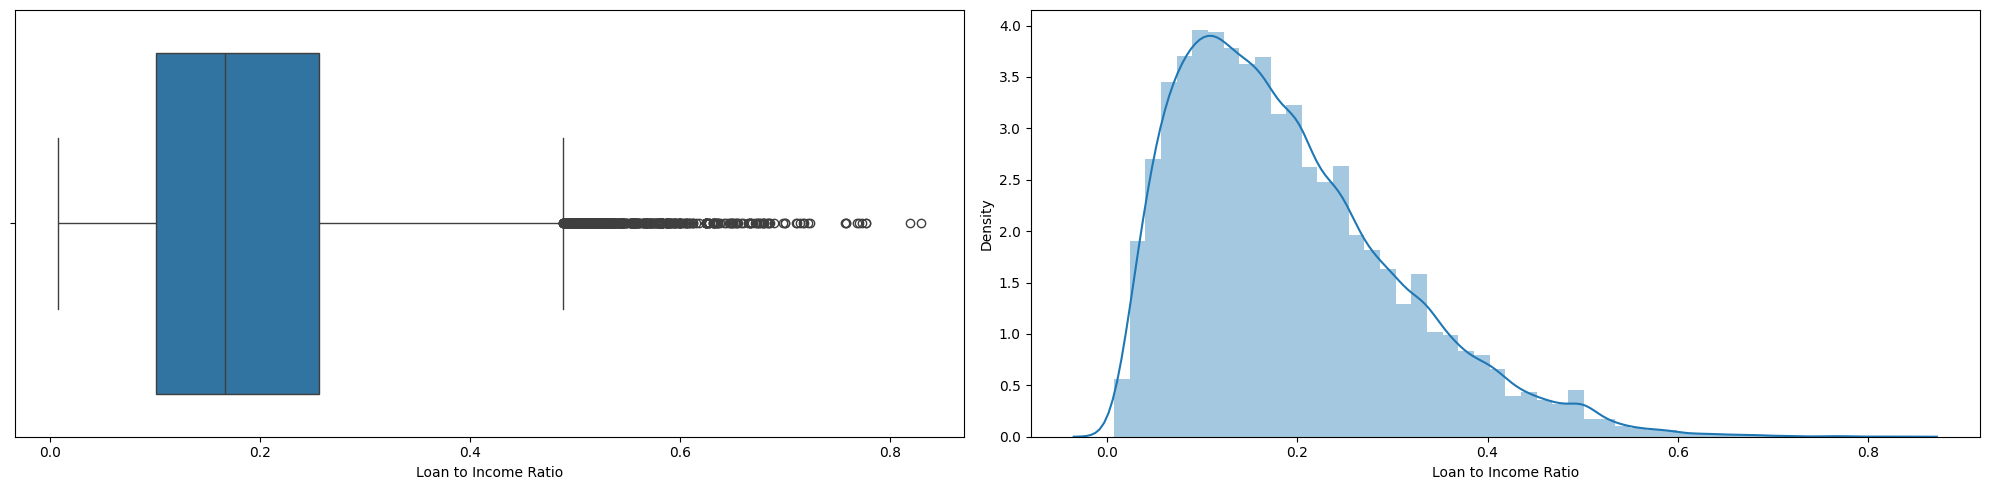

In [2407]:
generate_single_column_plots("loan_to_income_ratio", "Loan to Income Ratio", figsize=(20,5))

### 3.1.9. installment_to_income_ratio
__Inference:__ Mostly distributed around 0 to 0.01

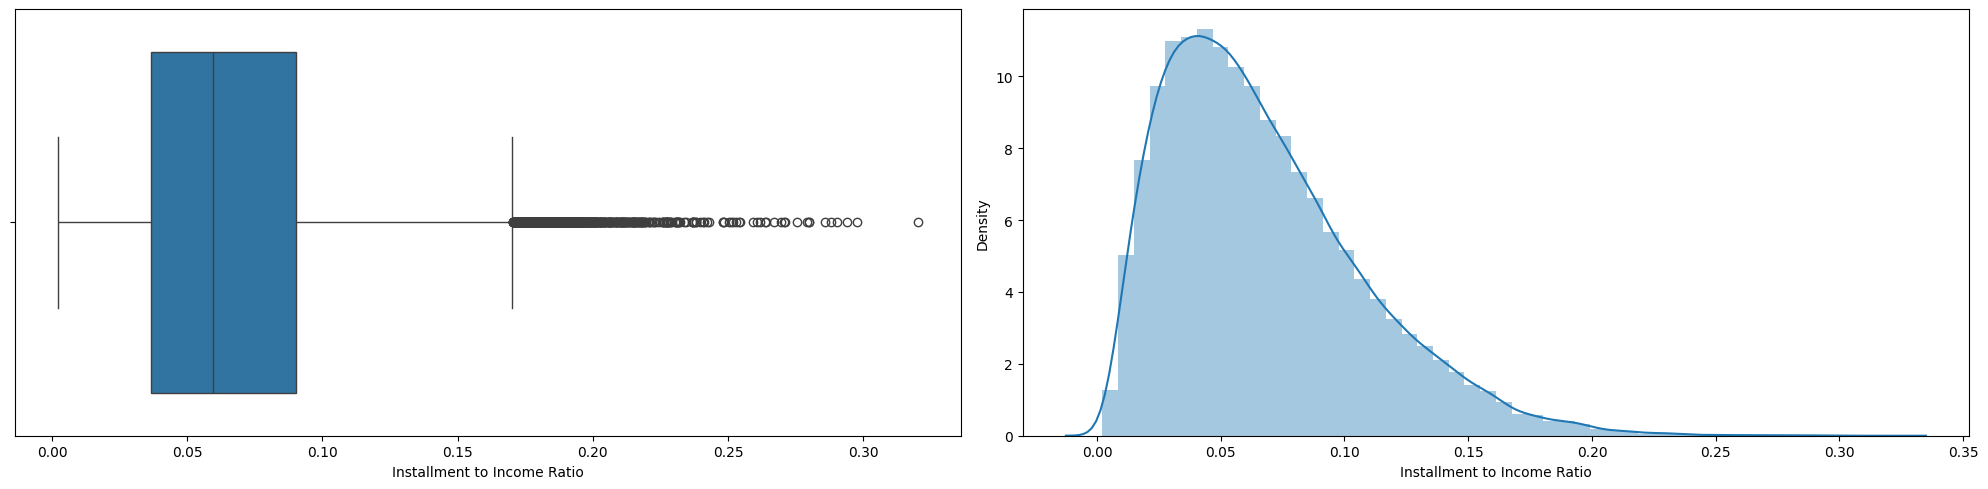

In [2408]:
generate_single_column_plots("installment_to_income_ratio", "Installment to Income Ratio", figsize=(20,5))

### 3.2. Categorical columns Visualization
cat_cols = ['term', 'int_rate_cat', 'open_acc_cat', 'total_acc_cat', 'grade', 'sub_grade', 'emp_length', 'home_ownership', 'verification_status', 'purpose', 'addr_state', 'pub_rec_bankruptcies']

assessement_cols = ['loan_status']

##### 3.2.1. loan_status
__inference:__ About 15% of our dataset have defaulted loans.

loan_status
0    85.21853
1    14.78147
Name: count, dtype: float64


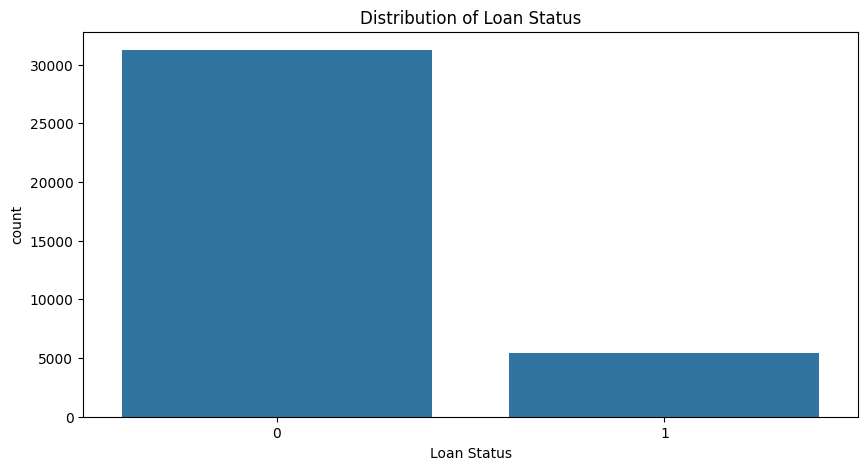

In [2409]:
generate_count_plot('loan_status', 'Loan Status', 'Distribution of Loan Status')

##### 3.2.2. term
_Inference:__ About 75% of the loans are of shorter duration

term
 36 months    75.628854
 60 months    24.371146
Name: count, dtype: float64


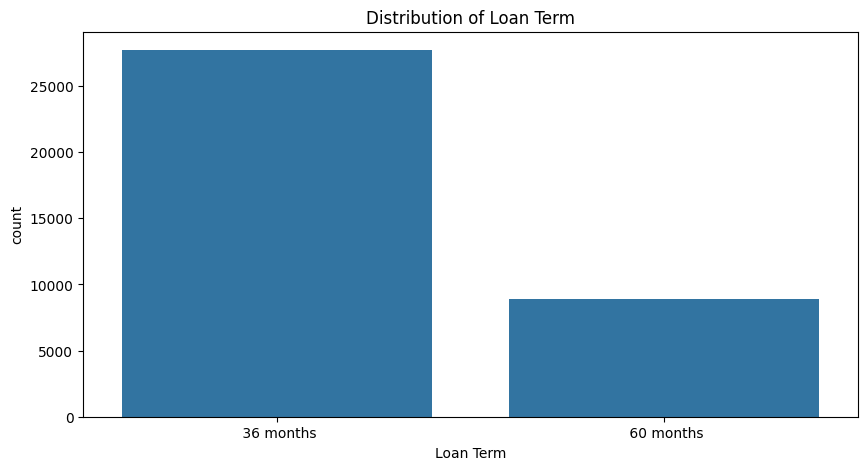

In [2410]:
generate_count_plot('term', 'Loan Term', 'Distribution of Loan Term')

##### 3.2.3. Interest Rate - int_rate_cat
__Inference:__ Majority of the loans are with interest rate in the range 10 to 15%

int_rate_cat
10-15    47.408196
5-10     32.258417
15-20    18.497299
20-25     1.836089
Name: count, dtype: float64


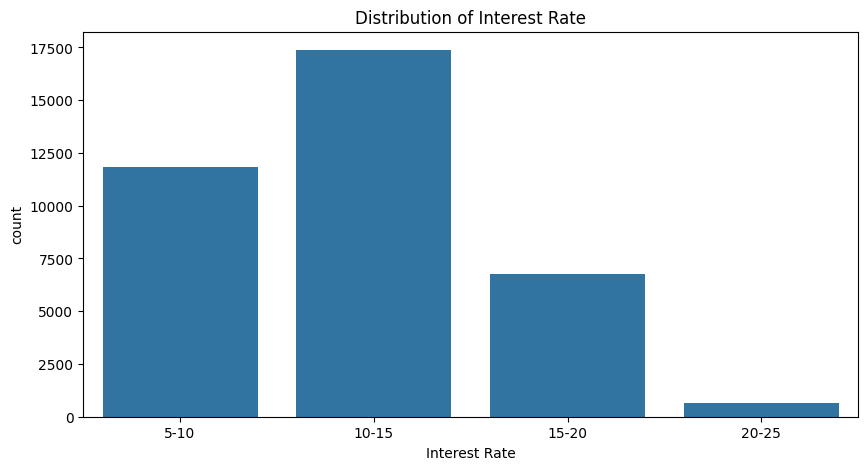

In [2411]:
generate_count_plot('int_rate_cat', 'Interest Rate', 'Distribution of Interest Rate')

##### 3.2.4. Open Credit Lines - open_acc_cat
__Inference:__ Majority of loan account holders have 5 to 10 open credit lines

open_acc_cat
5-10    47.831069
>=10    32.228406
<5      19.940525
Name: count, dtype: float64


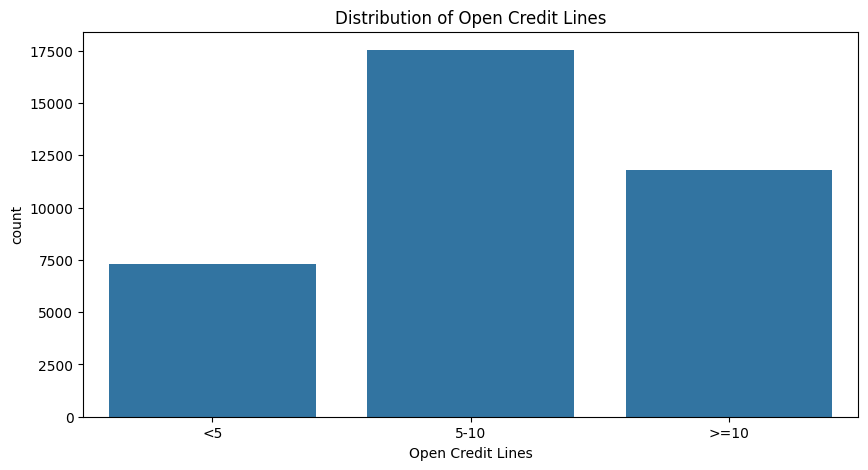

In [2412]:
generate_count_plot('open_acc_cat', 'Open Credit Lines', 'Distribution of Open Credit Lines')

##### 3.2.5. Total Credit Lines - total_acc_cat
__Inference:__ Majority of loan account holders have 5 to 10 total credit lines

total_acc_cat
5-10     47.831069
10-20    30.433241
<5       19.940525
>20       1.795166
Name: count, dtype: float64


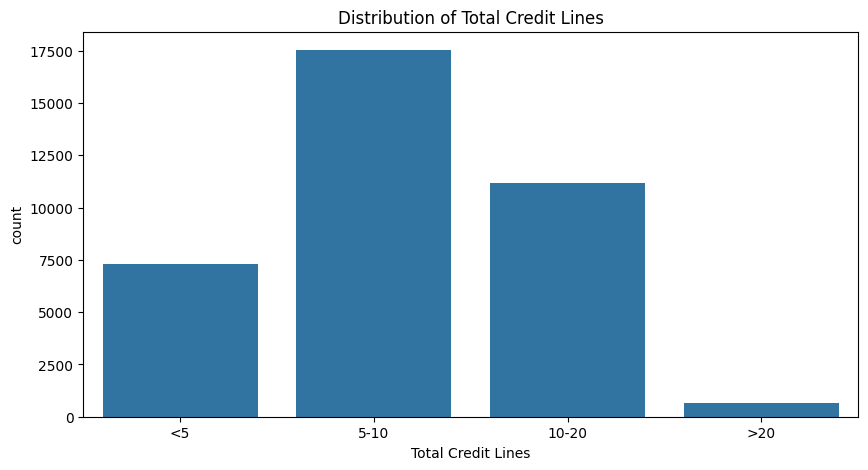

In [2413]:
generate_count_plot('total_acc_cat', 'Total Credit Lines', 'Distribution of Total Credit Lines')

##### 3.2.6. Grade 
__Inference:__ Loans are mostlly distributed between grades A to D with a majority of them with A and B

grade
B    30.275004
A    26.316364
C    20.409778
D    13.190920
E     6.678671
F     2.417199
G     0.712064
Name: count, dtype: float64


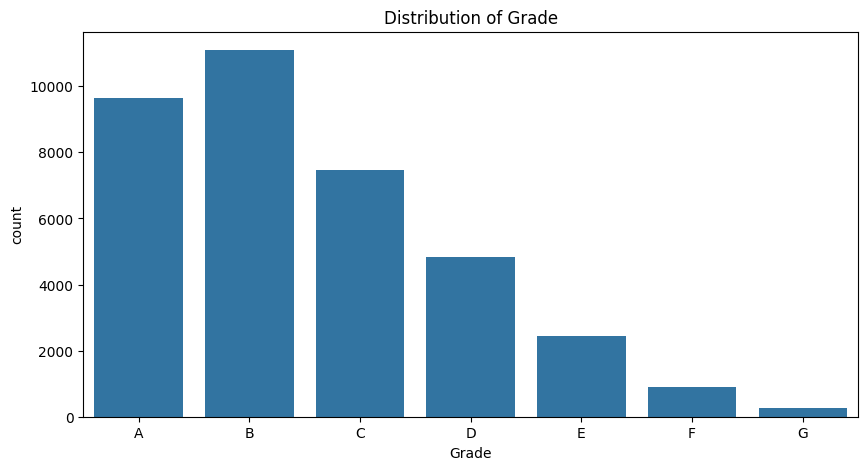

In [2414]:
generate_count_plot('grade', 'Grade', 'Distribution of Grade')

##### 3.2.7. Sub Grade - sub_grade
__Inference:__ As expected this trend is similar to Grade, also sub level 3 and 4 seem to have more loans.

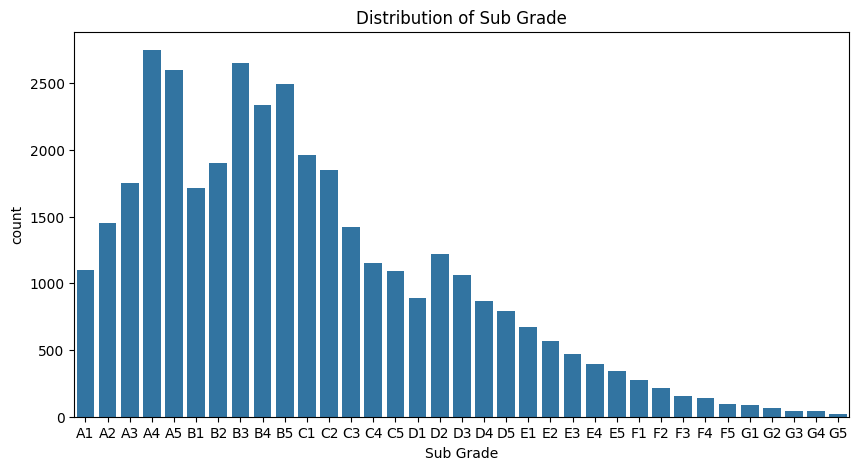

In [2415]:
generate_count_plot('sub_grade', 'Sub Grade', 'Distribution of Sub Grade', figsize=(10,5), print_stats=False)

##### 3.2.8. Employment Length emp_length
__Inference:__ About 24% of loan account holders have been employed for more than 10 ye

emp_length
10+ years    24.286572
< 1 year     11.804987
2 years      11.188411
3 years      10.432695
4 years       8.730289
5 years       8.304687
1 year        8.301959
6 years       5.655590
7 years       4.485186
8 years       3.663993
9 years       3.145632
Name: count, dtype: float64


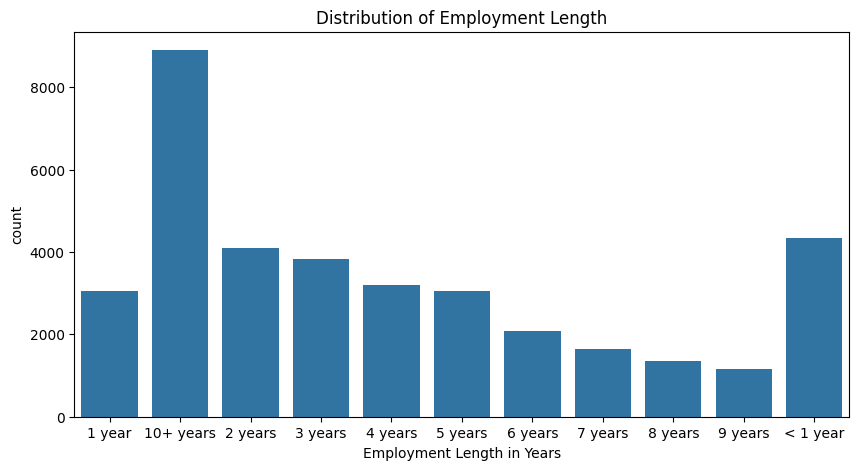

In [2416]:
generate_count_plot('emp_length', 'Employment Length in Years', 'Distribution of Employment Length')

##### 3.2.9. home_ownership
__Inference:__ Most of the borrowers are either on Rent or have mortgaged

home_ownership
RENT        49.192448
MORTGAGE    42.764773
OWN          7.780870
OTHER        0.253724
NONE         0.008185
Name: count, dtype: float64


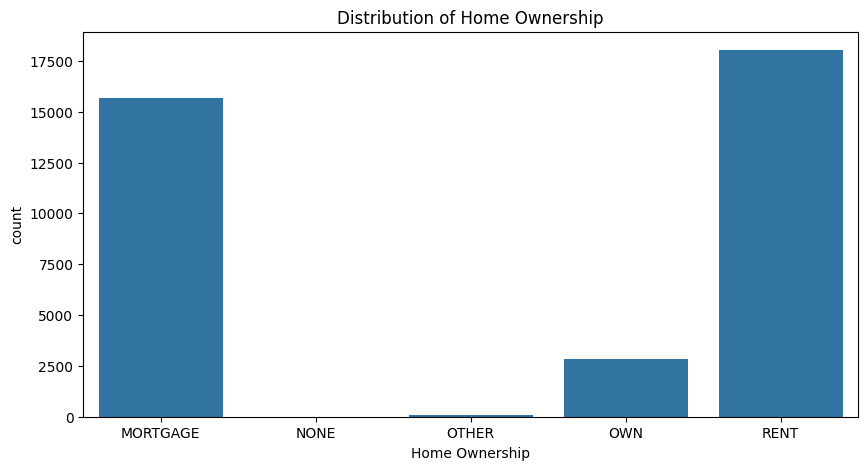

In [2417]:
generate_count_plot('home_ownership', 'Home Ownership', 'Distribution of Home Ownership')

##### 3.2.10. verification_status
__Inference:__ About 44% loans are not verified. Of the 5418 loans that are defaulted, 50% of them are not fully verified

In [2418]:
defaulted_loans_df['verification_status_hierarchy'].describe()

count    5418.000000
mean        0.972868
std         0.863705
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         2.000000
Name: verification_status_hierarchy, dtype: float64

verification_status
Not Verified       44.415343
Verified           30.607846
Source Verified    24.976810
Name: count, dtype: float64


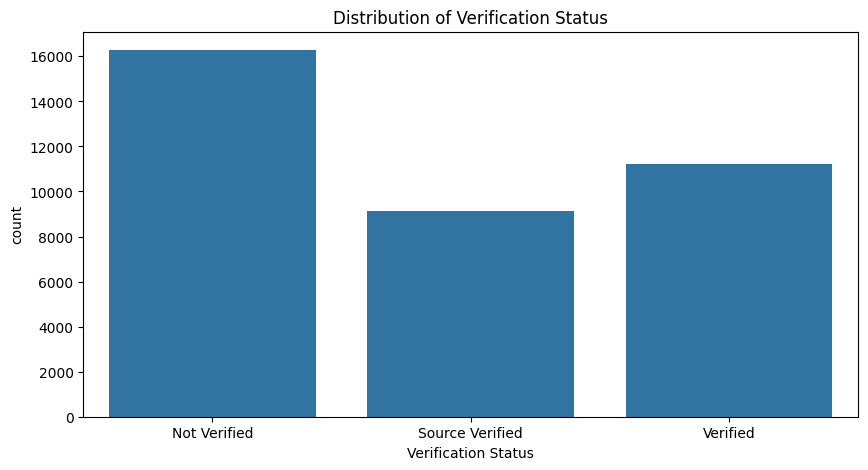

In [2419]:
generate_count_plot('verification_status', 'Verification Status', 'Distribution of Verification Status')

##### 3.2.11. purpose
__Inference:__ Major driving factor for taking a loan seems to be debt consolidation. Credit card comes a distant second.

purpose
debt_consolidation    47.211764
credit_card           13.049053
other                 10.091668
home_improvement       6.973318
major_purchase         5.581928
small_business         4.427893
car                    3.950456
wedding                2.436296
medical                1.748786
moving                 1.500518
vacation               0.995799
house                  0.922137
educational            0.851203
renewable_energy       0.259180
Name: count, dtype: float64


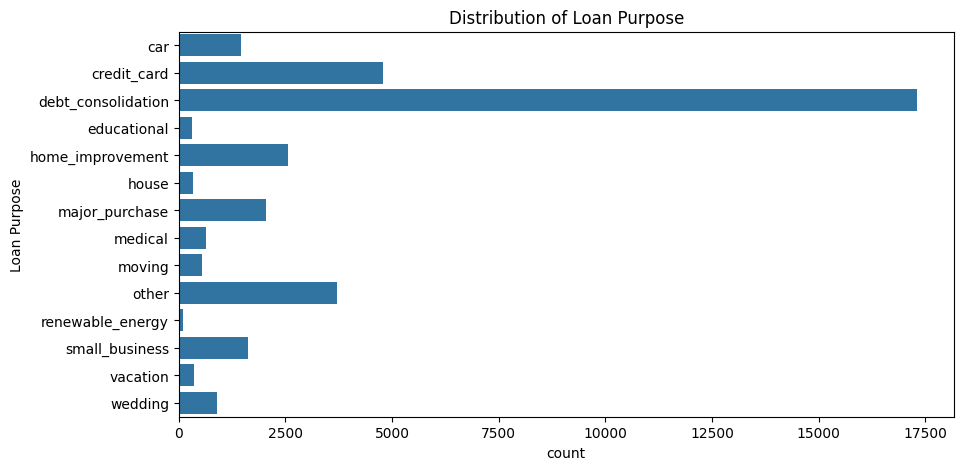

In [2420]:
generate_count_plot('purpose', 'Loan Purpose', 'Distribution of Loan Purpose', reverse=True)

##### 3.2.12. addr_state
__Inference:__ Majority of borrowers are from California followed by New York, Florida and Texas.

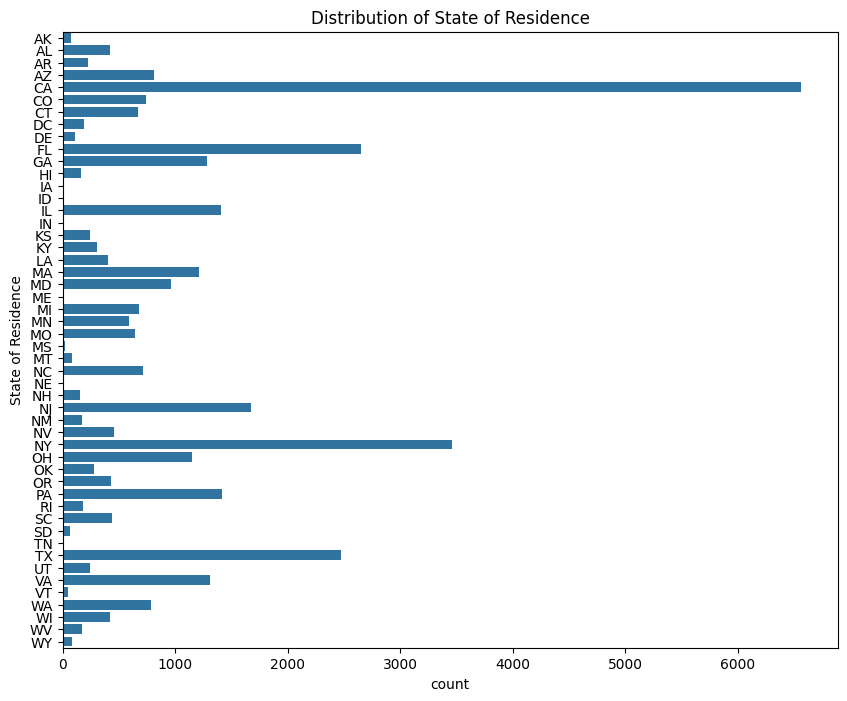

In [2421]:
generate_count_plot('addr_state', 'State of Residence', 'Distribution of State of Residence', reverse=True, figsize=(10,8), print_stats=False)

##### 3.2.13. pub_rec_bankruptcies
__Inference:__ About 95% do not have any public recorded backruptcies.

pub_rec_bankruptcies
0.0    95.623943
1.0     4.362416
2.0     0.013641
Name: count, dtype: float64


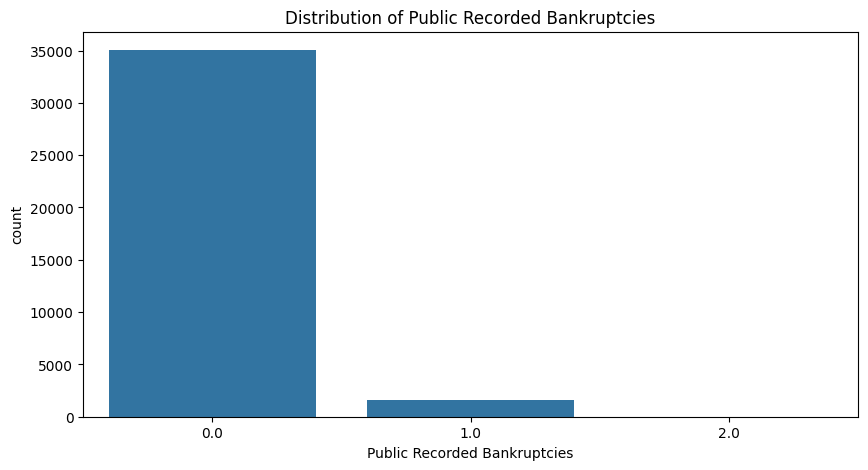

In [2422]:
generate_count_plot('pub_rec_bankruptcies', 'Public Recorded Bankruptcies', 'Distribution of Public Recorded Bankruptcies')

## 4. Segmented Univariate Analysis - Visualizing Data

### 4.1. Segmented Univariate Analysis of Term on Loan Status

__Inference__ : Loans with 60months term seem to have high probability of default and loans with 30m term are more likely to be paid off.

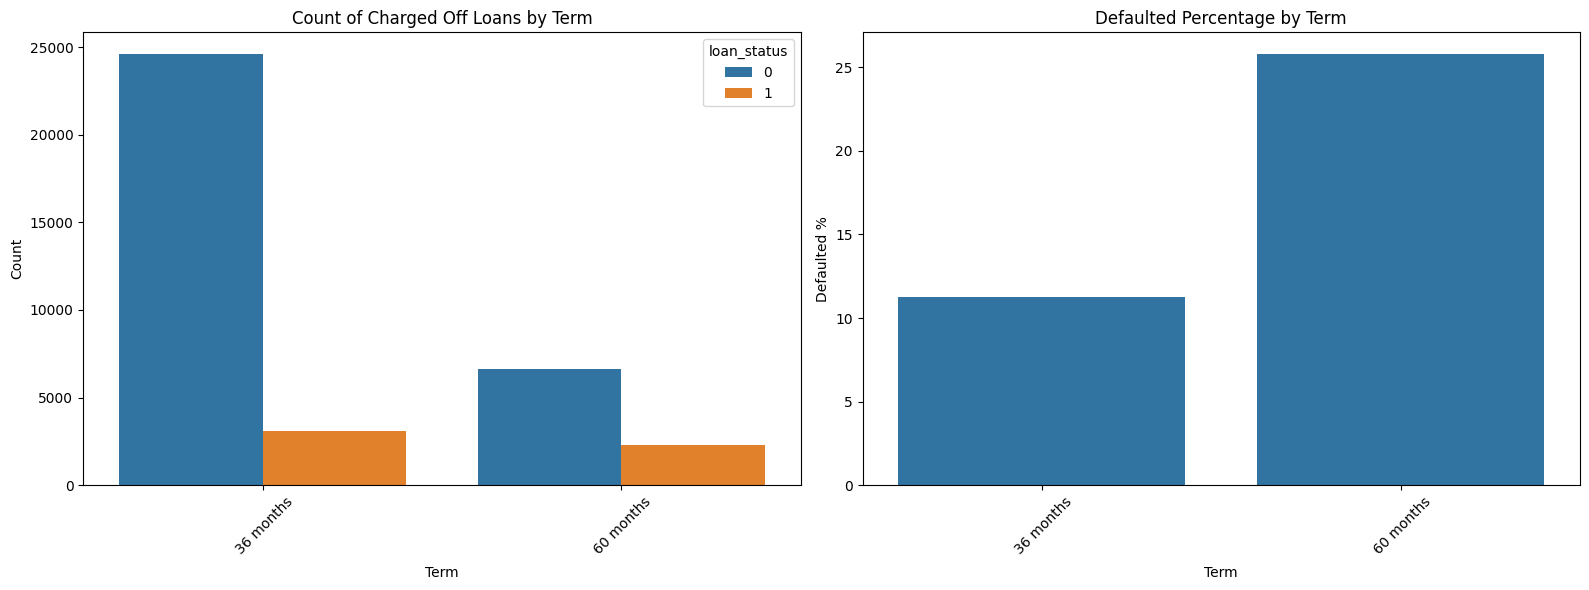

In [2423]:
segmented_univariate_analysis('term', 'Term')


### 4.2. Segmented Univariate Analysis of Home Ownership on Loan Status
__Inference__ : Majority of applicants are on RENT or on MORTGAGE and tendency to default is not impacted by home ownership.

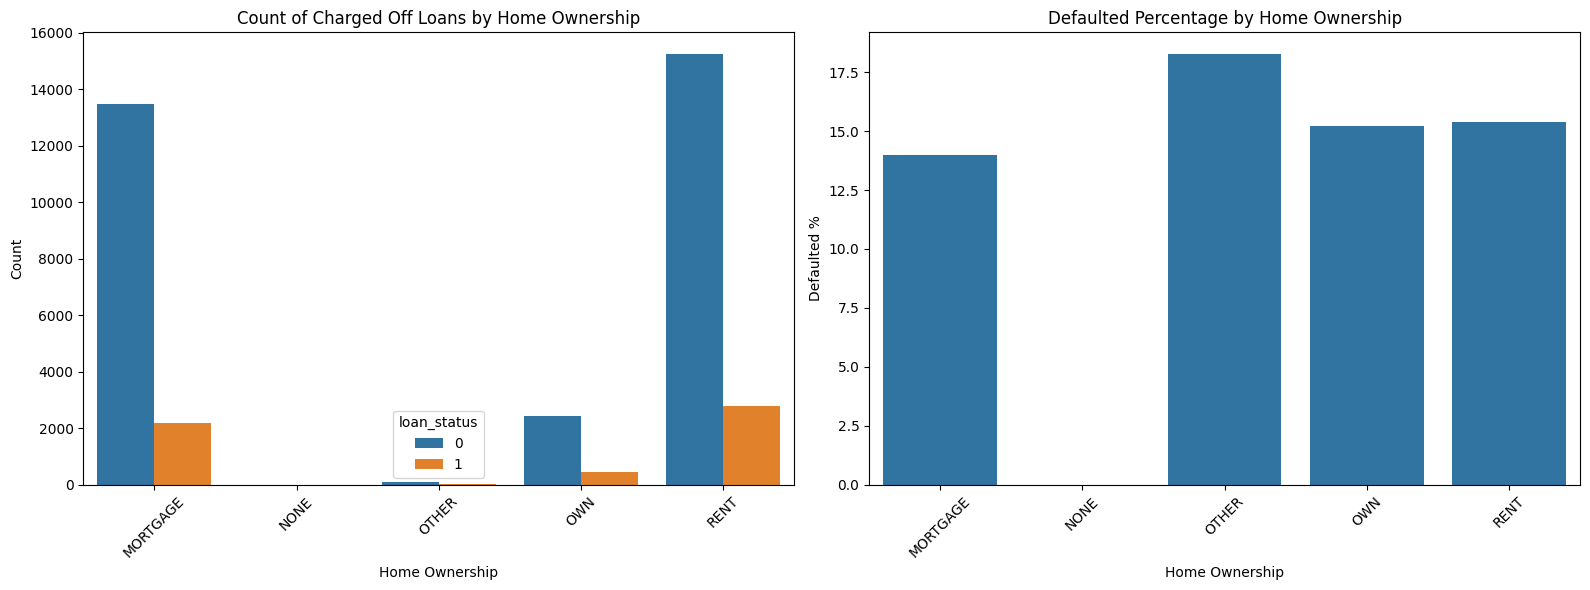

In [2424]:
segmented_univariate_analysis('home_ownership', 'Home Ownership')

### 4.3. Segmented Univariate Analysis of Verification Status on Loan Status
####  Inference - Loans with lower interest rates have lesser probability of default.

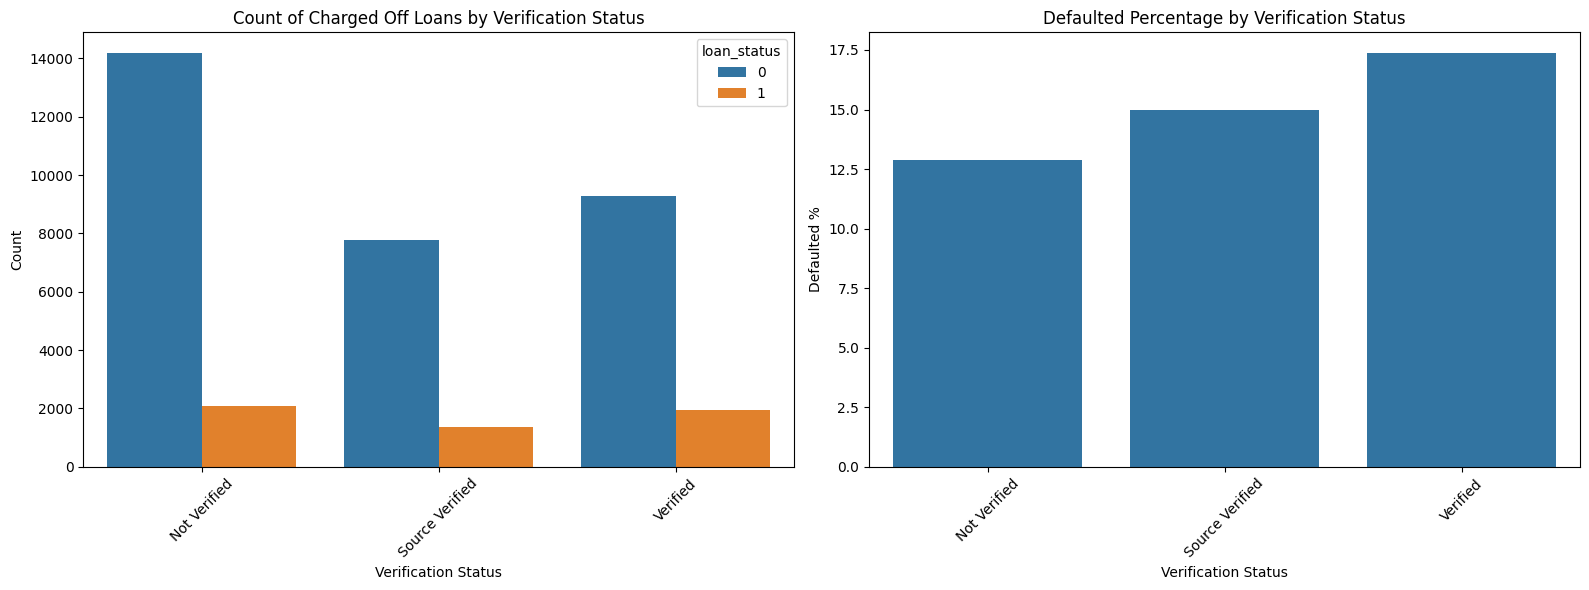

In [2425]:
segmented_univariate_analysis('verification_status', 'Verification Status')

### 4.4. Segmented Univariate Analysis of int_rate_cat on Loan Status
####  Inference - Loans with lower interest rates have lesser probability of default. Loans with higher interest have higher probability of default.

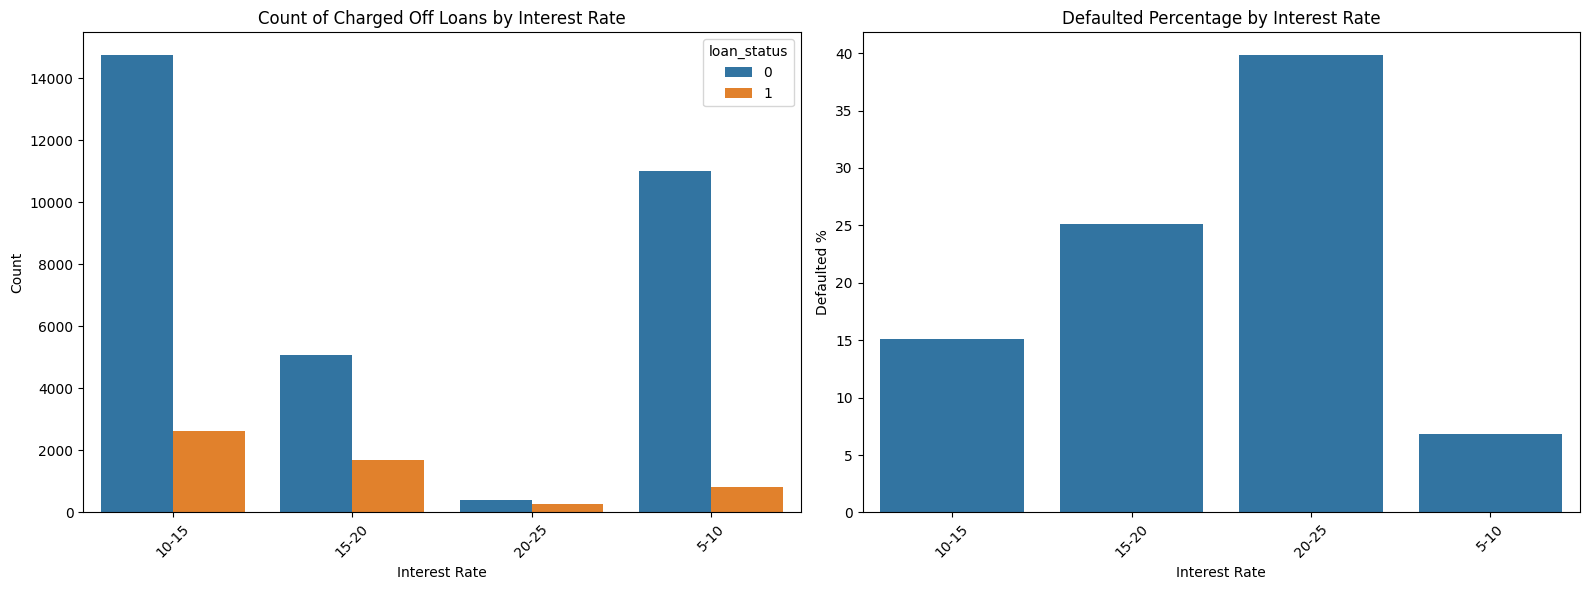

In [2426]:
segmented_univariate_analysis('int_rate_cat', 'Interest Rate')

### 4.5. Segmented Univariate Analysis of purpose on Loan Status
####  Inference - Small business purpose has highest probability of default, debt consolidation is most frequest purpose.

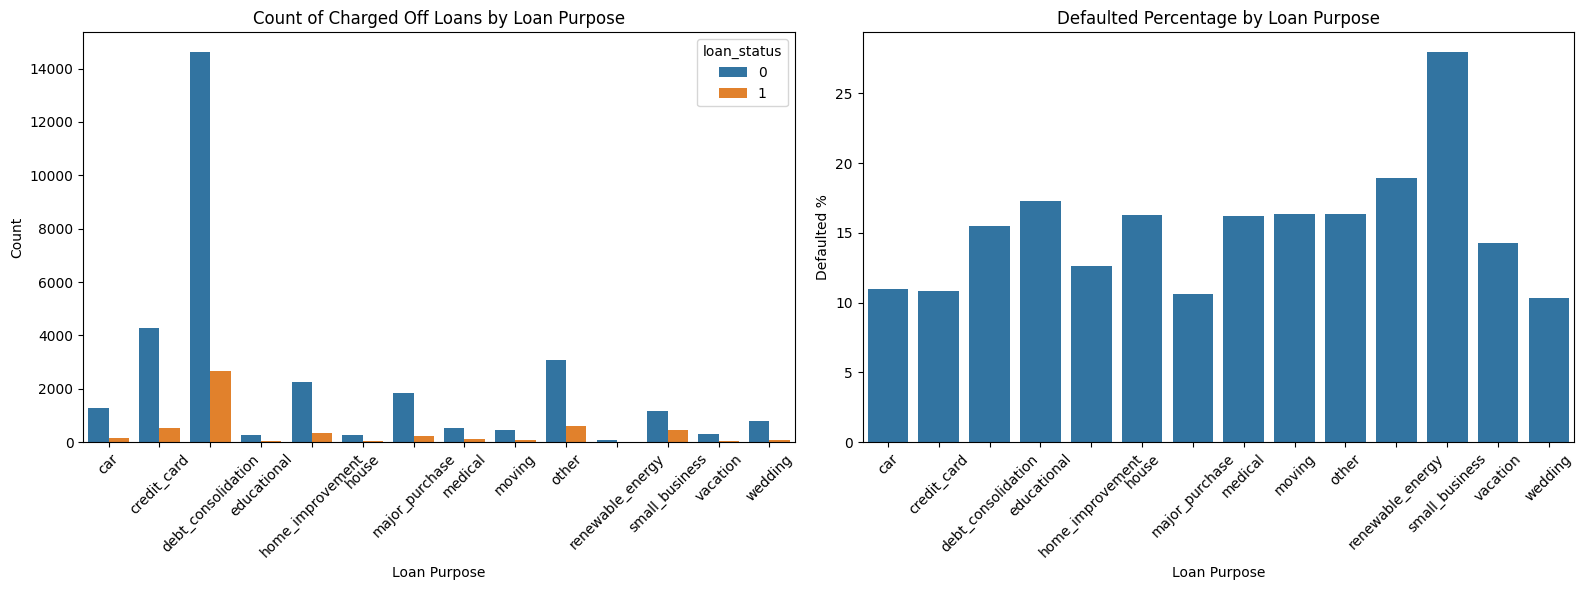

In [2427]:
segmented_univariate_analysis('purpose', 'Loan Purpose')

### 4.6. Segmented Univariate Analysis of grade on Loan Status
####  Inference - Loans designated with lower grade have higher rate of defaults. Thus proving that the grading mechanism followed for loans is appropriate.

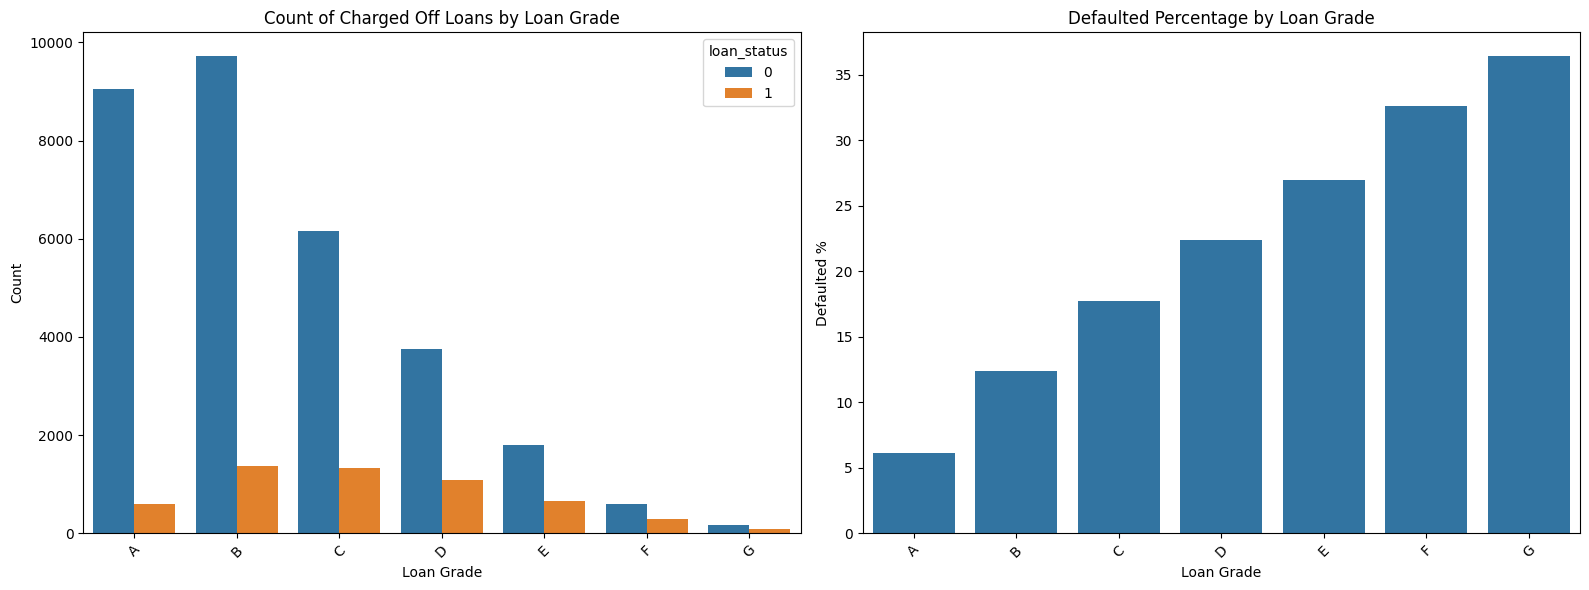

In [2428]:
segmented_univariate_analysis('grade', 'Loan Grade')

### 4.7. Segmented Univariate Analysis of debt to income ratio on Loan Status
####  Inference - Loans with higher dti have higher possibility of default.

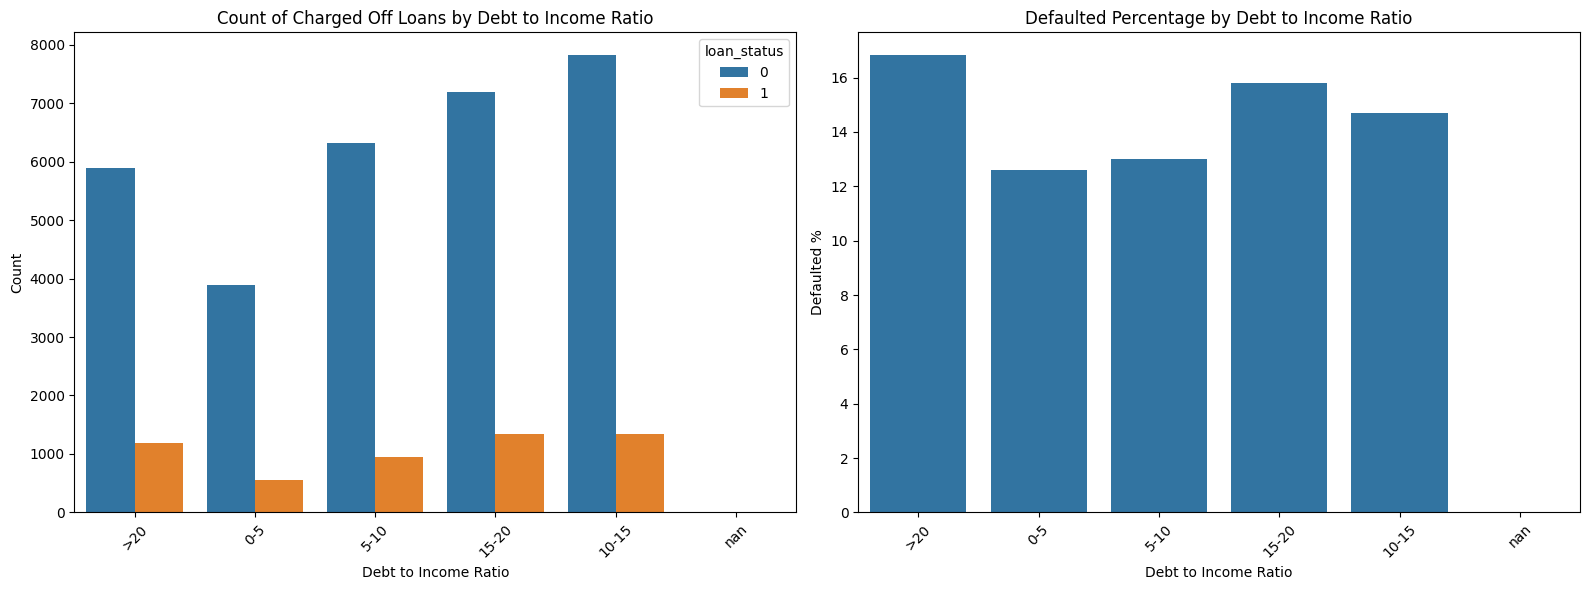

In [2429]:
segmented_univariate_analysis('dti_cat', 'Debt to Income Ratio', sort=False)

### 4.8. Segmented Univariate Analysis of installment_to_income_ratio_cat on Loan Status
####  Inference - Borrowers with installment to monthly income ration >6% have higher probability of default

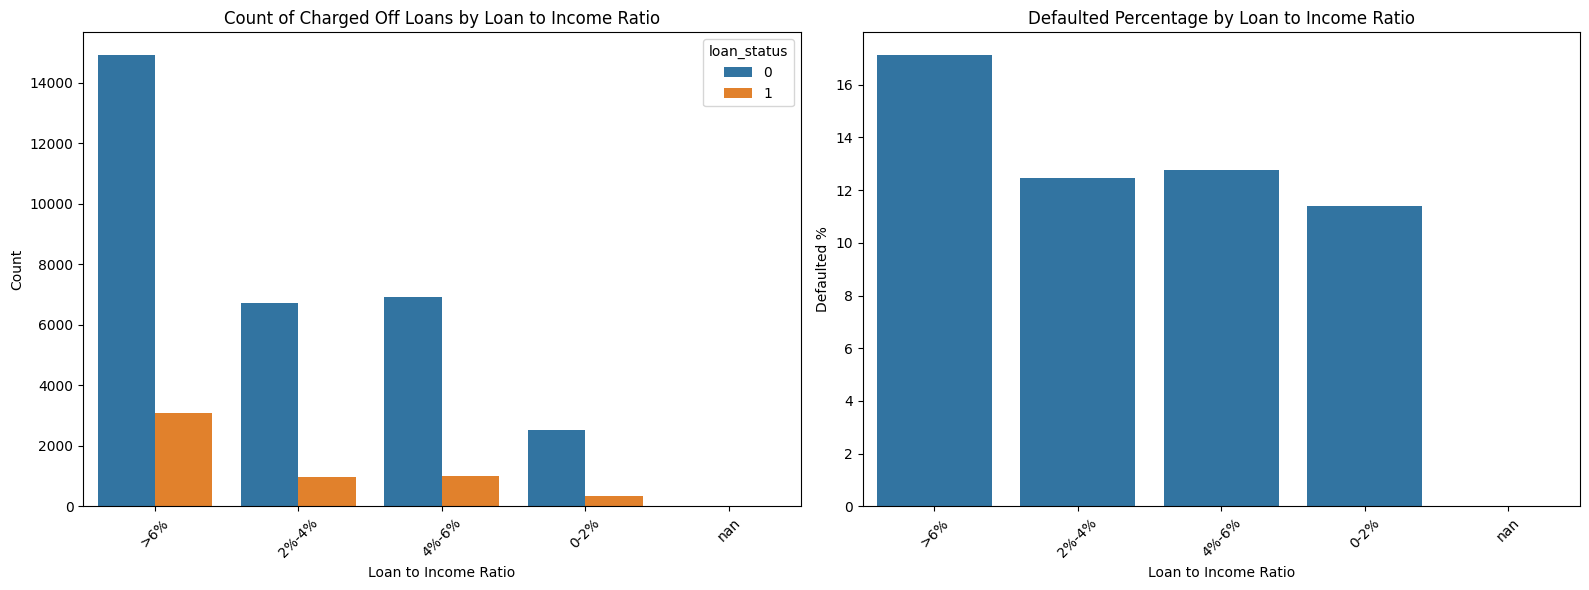

In [2430]:
segmented_univariate_analysis('installment_to_income_ratio_cat', 'Loan to Income Ratio', sort=False)

## 5. Bivariate Analysis - Visualizing Data
Explore the relationships between two variables (Scatterplot, boxplot,barplot etc).
Since we are interested mostly in the impact on Loan Status, we will explore the relationship between loan_status and other variables.

num_cols = ['loan_amnt', 'installment', 'annual_inc', 'dti', 'cr_line_hist_years', 'inq_last_6mths', 'pub_rec']

cat_cols = ['term', 'int_rate_cat', 'open_acc_cat', 'total_acc_cat', 'grade', 'sub_grade', 'emp_length', 'home_ownership', 'verification_status', 'purpose', 'addr_state', 'pub_rec_bankruptcies']

assessement_cols = ['loan_status']

### 5.1. Bivariate Analysis - Loan Amount and Interest Rate

Justification for this combination: Higher loan amounts and higher interest rates might lead to increased default risk.

__Inference__: Loans with Higher loan amount and higher interest especially between 20 -25 % tend to be defaulted.

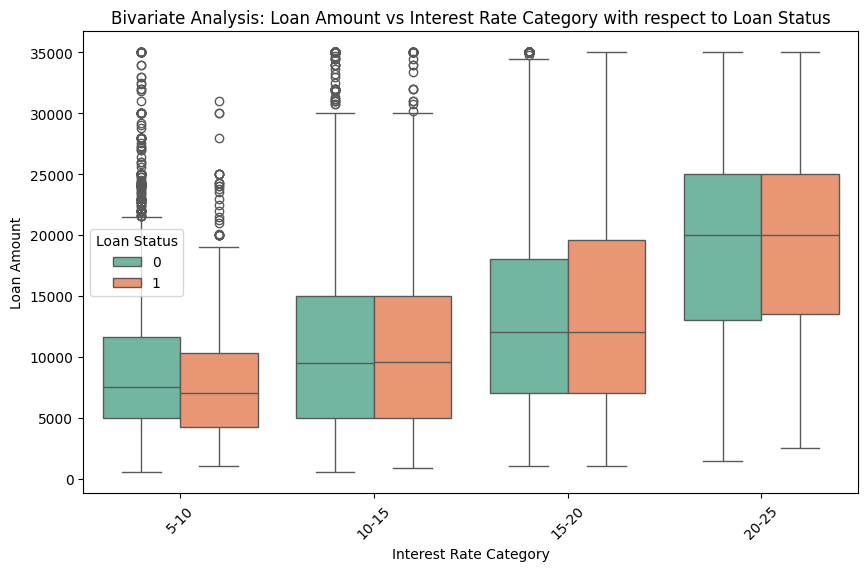

In [2431]:
bivariate_analysis_num_cat('loan_amnt', 'int_rate_cat', 'Loan Amount', 'Interest Rate Category')

### 5.2. Bivariate Analysis - Term and Installment:
Justification for this combination: Longer loan terms and higher monthly installments could indicate higher risk as borrowers might find it challenging to sustain payments over an extended period.

__Inference__: Loans with 60 Months term and with higher instalment has a higher probability of getting defaulted.

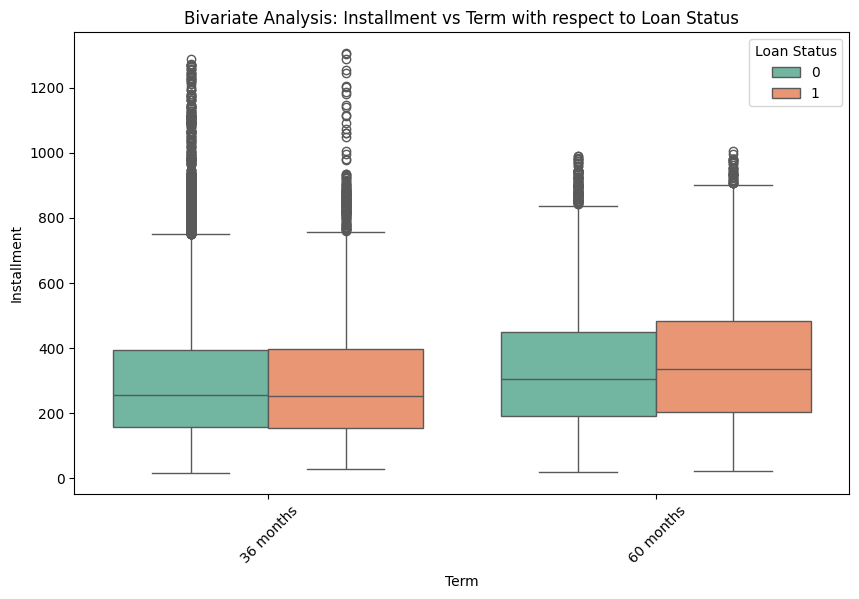

In [2432]:
bivariate_analysis_num_cat('installment', 'term', 'Installment', 'Term')

### 5.3. Bivariate Analysis - Employment Length and Annual Income:
Justification for this combination: Longer employment length and higher annual income might signify stability and ability to repay loans, reducing the likelihood of default.

__Inference__: As the employment length and annaul income increase, the tendency to default reduces.

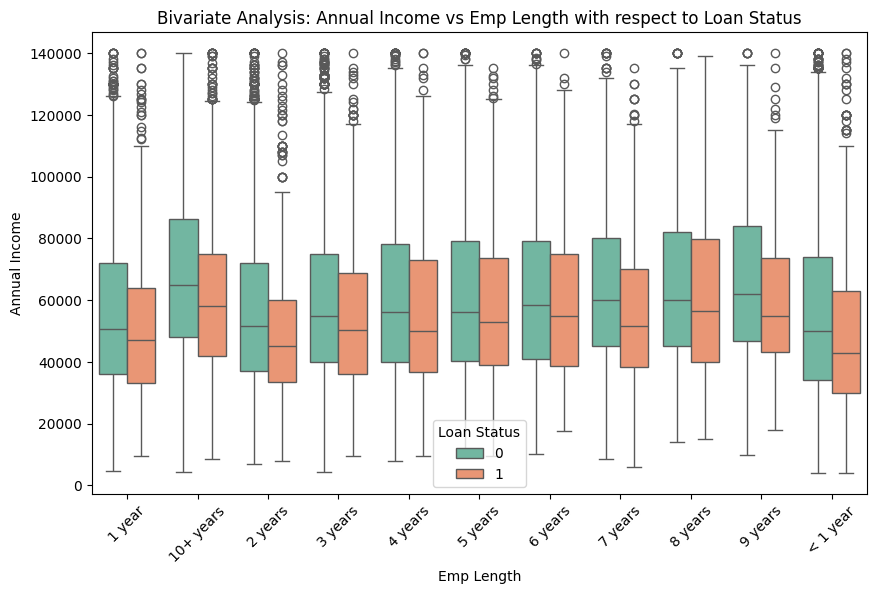

In [2433]:
bivariate_analysis_num_cat('annual_inc', 'emp_length', 'Annual Income', 'Emp Length')

### 5.4. Bivariate Analysis - Home Ownership and Debt-to-Income Ratio (DTI):
Justification for this combination: Homeowners might have more stable financial situations, while higher DTI ratios could indicate over-leveraging and increased default risk.

__Inference__: Applicants with Higher Debt to Income ratio and on Mortgage home tend to default.

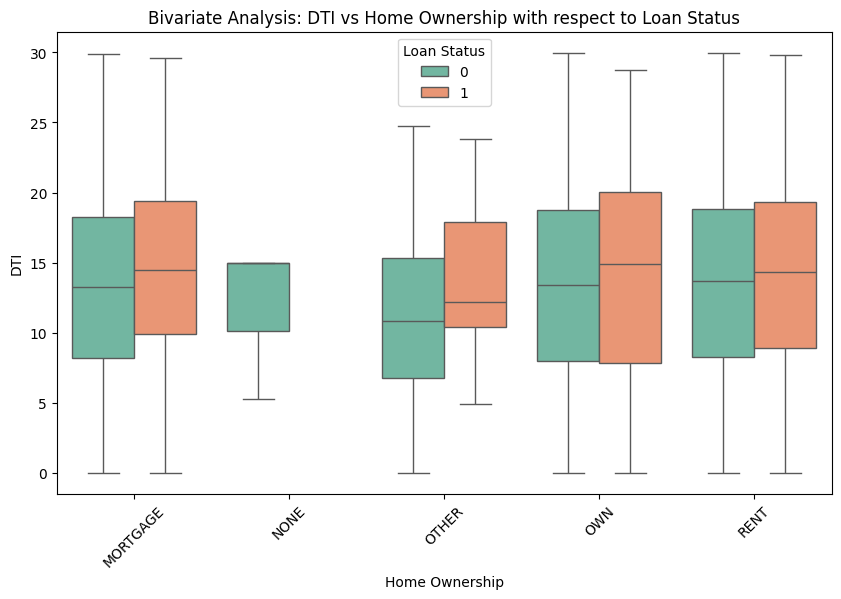

In [2434]:
bivariate_analysis_num_cat('dti', 'home_ownership', 'DTI', 'Home Ownership')

### 5.5. Bivariate Analysis - installment_to_income_ratio, term:
Justification for this combination: Homeowners might have more stable financial situations, while higher DTI ratios could indicate over-leveraging and increased default risk.

__Inference__: Applicants with Higher Installment to monthly income ratio tend to default.

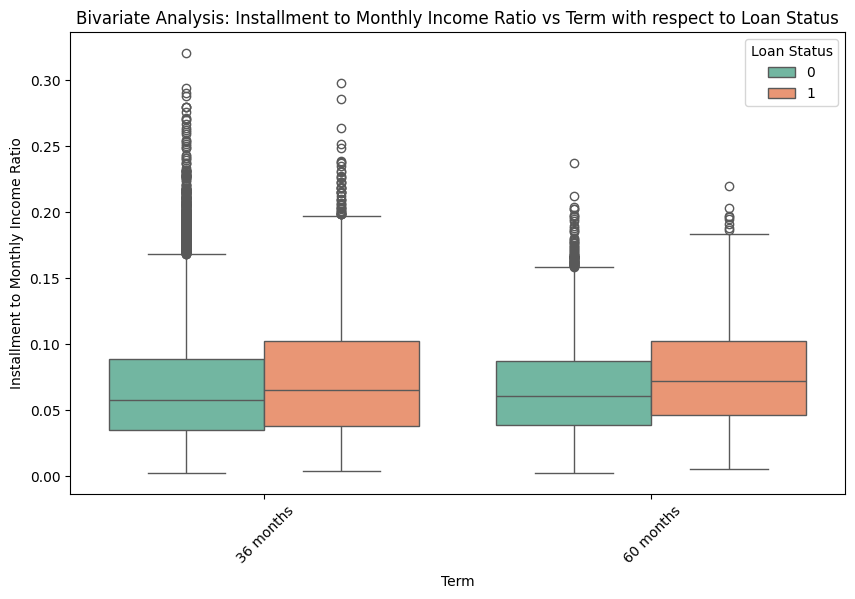

In [2435]:
bivariate_analysis_num_cat('installment_to_income_ratio', 'term', 'Installment to Monthly Income Ratio', 'Term')

### 5.6. Bivariate Analysis - Purpose and Term:
Justification for this combination: provides insights into the risk profile of loans based on their duration and intended use.

__Inference__: Loans with purpose Debt_Consolidation across both terms have higher tendency to default

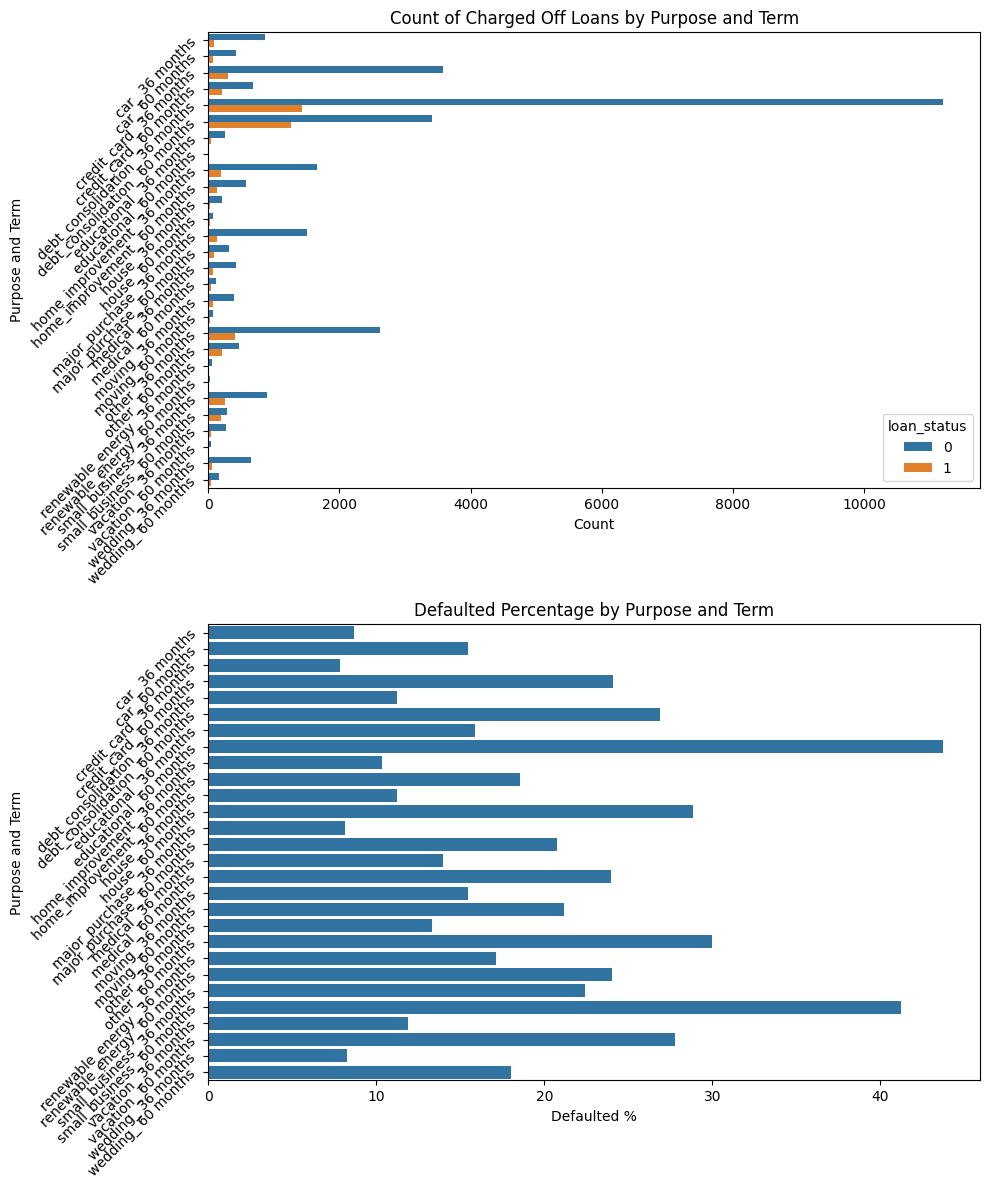

In [2436]:
loan_df['purpose_and_term'] = loan_df['purpose'].str.cat(loan_df['term'], sep='_')
segmented_univariate_analysis('purpose_and_term', 'Purpose and Term', sidetoside=False, reverse=True)

## 6. Multivariate Analysis - Heat Map

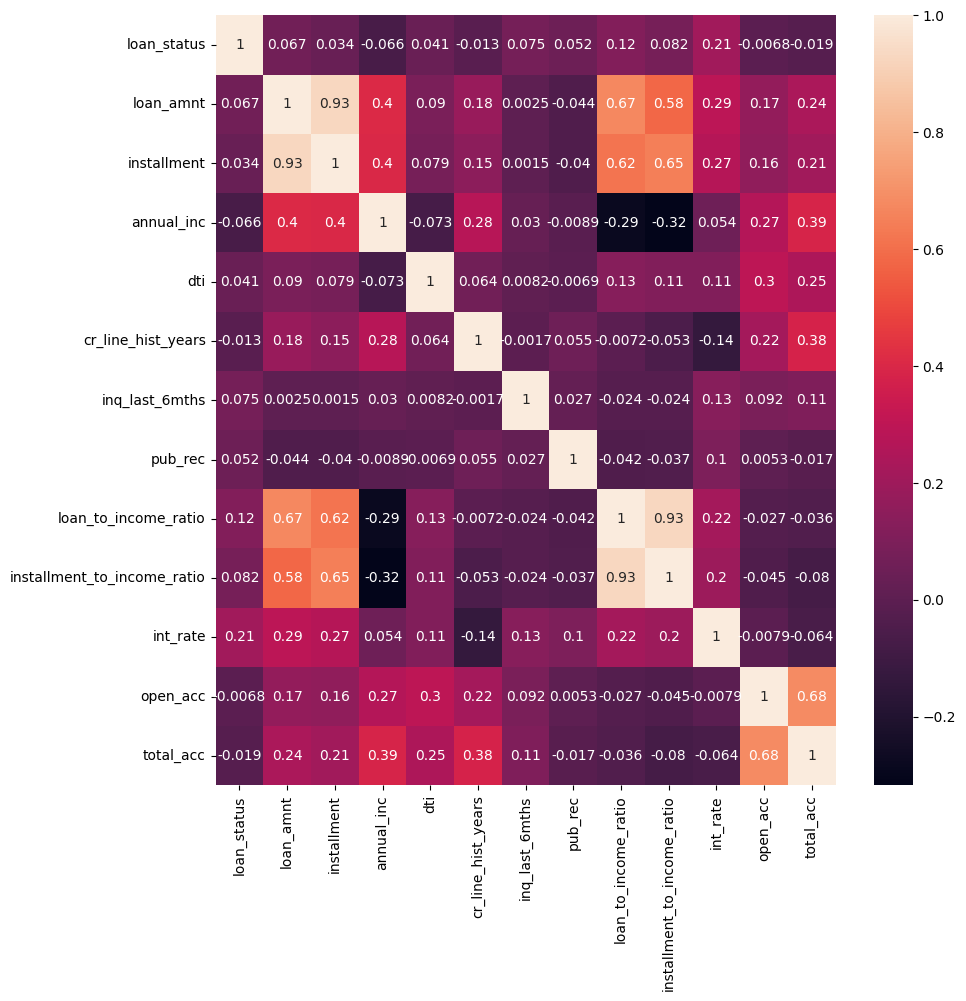

In [2437]:
all_num_cols = ['loan_status','loan_amnt', 'installment', 'annual_inc', 'dti', 'cr_line_hist_years', 'inq_last_6mths',  'pub_rec', 'loan_to_income_ratio', 'installment_to_income_ratio', 'int_rate', 'open_acc', 'total_acc']
plt.figure(figsize=(10,10))
sns.heatmap(loan_df[all_num_cols].corr(),annot=True)
plt.show()

## 7. Summary of Analysis

### Univariate Analysis:
- About 50% of the borrowers have Loan amount between 5000 and 15000
- Installment is mostly distributed around 100 to 400
- About 50% of the borrowers have Annual income between 30000 to 80000
- Most of the borrowers have Debt to Income ratio around 8 to 13.
- About 15% of our dataset have defaulted loans
- About 75% of the loans are of shorter duration
- Majority of the loans are with interest rate in the range 10 to 15%
- Majority of loan account holders have 5 to 10 open and total credit lines
- Loans are mostlly distributed between grades A to D with a majority of them with A and B
- Most of the borrowers are either on Rent or have mortgaged
- About 44% loans are not verified. Of the 5418 loans that are defaulted, only 30% loans are fully verified
- Major driving factor for taking a loan seems to be debt consolidation. Credit card comes a distant second.
- Majority of borrowers are from California followed by New York, Florida and Texas.
- About 95% do not have any public recorded backruptcies.

### Segmented Univariate Analysis:
- Loans with 60months term seem to have high probability of default and loans with 30m term are more likely to be paid off
- Loans with lower interest rates have lesser probability of default.
- Loans with higher dti have higher possibility of default.
- Small business purpose has highest probability of default, debt consolidation is most frequent purpose.
- Majority of applicants are on RENT or on MORTGAGE and tendency to default is not impacted by home ownership.
- Loans designated with lower grade have higher rate of defaults. Thus proving that the grading mechanism followed for loans is appropriate.

### Bivariate Analysis:
- Loans with Higher loan amount and higher interest especially between 20 -25 % tend to be defaulted.
- Loans with 60 Months term and with higher instalment has a higher probability of getting defaulted.
- As the employment length and annaul income increase, the tendency to default reduces.
- Applicants with Higher Debt to Income ratio and on Mortgage home tend to default.
- Applicants with Higher Installment to monthly income ratio tend to default.
- Loans with purpose debt_Consolidation across both terms have higher tendency to default

### Conclusion - Driving factors for Loan default are:
- Debt to Income Ratio  > 10 have high probability of defaulting
- Borrowers with installment to monthly income ratio  >6% have higher probability of default
- Purpose small business , debt consolidation and credit cards, and have 5 to 10% of their monthly income as their monthly installment are more likely to default.
- Applicants with higher interest rates are more likely to default.
- Borrowers with less interest rate are less likely to default
- Loans with purpose Debt_Consolidation across both terms have higher tendency to default
- Applicants with Higher Debt to Income ratio especially on Mortgage home tend to default.
- Loans with 60 Months term and with higher instalment has a higher probability of getting defaulted.
